In [204]:
from binance.client import Client
import pandas as pd

# Binance API Bağlantısı
api_key = "api_key"
api_secret = "secret_key"
client = Client(api_key, api_secret)

# USDT Paritelerini Al ve En Yüksek Hacimlileri Seç
def get_top_30_pairs():
    tickers = client.get_ticker()
    usdt_pairs = [
        ticker for ticker in tickers if ticker['symbol'].endswith('USDT') and not ticker['symbol'].startswith('USD')
    ]
    sorted_pairs = sorted(usdt_pairs, key=lambda x: float(x['quoteVolume']), reverse=True)[:30]
    return [pair['symbol'] for pair in sorted_pairs]

# Tarih Aralığında Verileri Çek
def get_historical_data(symbol, interval, start_str):
    klines = client.get_historical_klines(symbol, interval, start_str)
    df = pd.DataFrame(klines, columns=[
        'Open Time', 'Open', 'High', 'Low', 'Close', 'Volume',
        'Close Time', 'Quote Asset Volume', 'Number of Trades',
        'Taker Buy Base Volume', 'Taker Buy Quote Volume', 'Ignore'
    ])
    df['Open Time'] = pd.to_datetime(df['Open Time'], unit='ms')
    df['Close Time'] = pd.to_datetime(df['Close Time'], unit='ms')
    df.set_index('Open Time', inplace=True)
    df = df[['Open', 'High', 'Low', 'Close', 'Volume']]  # Gerekli sütunları filtrele
    return df

# Hacme Göre İlk 30 Pariteyi Al
top_30_pairs = get_top_30_pairs()

# Her Bir Parite İçin Verileri Çek ve CSV'ye Kaydet
for pair in top_30_pairs:
    print(f"{pair} verileri indiriliyor...")
    data = get_historical_data(pair, Client.KLINE_INTERVAL_3MINUTE, "20 Sep 2024")
    data.to_csv(f"{pair}.csv")
    print(f"{pair} verileri kaydedildi.")


BTCUSDT verileri indiriliyor...
BTCUSDT verileri kaydedildi.
XRPUSDT verileri indiriliyor...
XRPUSDT verileri kaydedildi.
ETHUSDT verileri indiriliyor...
ETHUSDT verileri kaydedildi.
DOGEUSDT verileri indiriliyor...
DOGEUSDT verileri kaydedildi.
SOLUSDT verileri indiriliyor...
SOLUSDT verileri kaydedildi.
FDUSDUSDT verileri indiriliyor...
FDUSDUSDT verileri kaydedildi.
PEPEUSDT verileri indiriliyor...
PEPEUSDT verileri kaydedildi.
ACTUSDT verileri indiriliyor...
ACTUSDT verileri kaydedildi.
ADAUSDT verileri indiriliyor...
ADAUSDT verileri kaydedildi.
XLMUSDT verileri indiriliyor...
XLMUSDT verileri kaydedildi.
BNBUSDT verileri indiriliyor...
BNBUSDT verileri kaydedildi.
ALGOUSDT verileri indiriliyor...
ALGOUSDT verileri kaydedildi.
ENSUSDT verileri indiriliyor...
ENSUSDT verileri kaydedildi.
PNUTUSDT verileri indiriliyor...
PNUTUSDT verileri kaydedildi.
HBARUSDT verileri indiriliyor...
HBARUSDT verileri kaydedildi.
SHIBUSDT verileri indiriliyor...
SHIBUSDT verileri kaydedildi.
THEUSDT 

In [231]:
import os
import pandas as pd

# CSV dosyalarını otomatik olarak bul
def find_csv_files(directory='.'):
    return [file for file in os.listdir(directory) if file.endswith('.csv')]

# CSV dosyalarını oku
stock_data = {}
csv_files = find_csv_files()

for file in csv_files:
    ticker = file.replace('.csv', '')  # Dosya adından ticker ismini çıkar
    try:
        df = pd.read_csv(file, index_col='Open Time', parse_dates=True)
        stock_data[ticker] = df
    except Exception as e:
        print(f"Dosya okunurken hata oluştu: {file} - {e}")

# Veri aralıklarını tanımla
training_data_time_range = ('2024-01-01', '2024-11-24')
validation_data_time_range = ('2024-11-25', '2024-11-28')
test_data_time_range = ('2024-11-29', '2024-11-30')

# Verileri böl
training_data = {}
validation_data = {}
test_data = {}

for ticker, df in stock_data.items():
    training_data[ticker] = df.loc[training_data_time_range[0]:training_data_time_range[1]]
    validation_data[ticker] = df.loc[validation_data_time_range[0]:validation_data_time_range[1]]
    test_data[ticker] = df.loc[test_data_time_range[0]:test_data_time_range[1]]

# Örnek bir coin için veri şekillerini yazdır
if stock_data:
    example_ticker = list(stock_data.keys())[0]  # İlk bulunan ticker
    print(f"Örnek coin: {example_ticker}")
    print(f'Training data shape for {example_ticker}: {training_data[example_ticker].shape}')
    print(f'Validation data shape for {example_ticker}: {validation_data[example_ticker].shape}')
    print(f'Test data shape for {example_ticker}: {test_data[example_ticker].shape}')

    # İlk 5 satırı görüntüle
    print(stock_data[example_ticker].head())
else:
    print("Hiç CSV dosyası bulunamadı.")


Örnek coin: XLMUSDT
Training data shape for XLMUSDT: (31680, 5)
Validation data shape for XLMUSDT: (1920, 5)
Test data shape for XLMUSDT: (729, 5)
                       Open    High     Low   Close    Volume
Open Time                                                    
2024-09-20 00:00:00  0.0961  0.0962  0.0960  0.0961  100010.0
2024-09-20 00:03:00  0.0961  0.0962  0.0960  0.0961  123485.0
2024-09-20 00:06:00  0.0962  0.0962  0.0960  0.0961   84175.0
2024-09-20 00:09:00  0.0961  0.0962  0.0960  0.0960  152533.0
2024-09-20 00:12:00  0.0960  0.0961  0.0959  0.0961  159890.0


In [232]:
print(training_data)

{'XLMUSDT':                        Open    High     Low   Close     Volume
Open Time                                                     
2024-09-20 00:00:00  0.0961  0.0962  0.0960  0.0961   100010.0
2024-09-20 00:03:00  0.0961  0.0962  0.0960  0.0961   123485.0
2024-09-20 00:06:00  0.0962  0.0962  0.0960  0.0961    84175.0
2024-09-20 00:09:00  0.0961  0.0962  0.0960  0.0960   152533.0
2024-09-20 00:12:00  0.0960  0.0961  0.0959  0.0961   159890.0
...                     ...     ...     ...     ...        ...
2024-11-24 23:45:00  0.5259  0.5326  0.5199  0.5320  7999143.0
2024-11-24 23:48:00  0.5321  0.5412  0.5304  0.5406  6281799.0
2024-11-24 23:51:00  0.5407  0.5457  0.5340  0.5382  6437528.0
2024-11-24 23:54:00  0.5381  0.5446  0.5338  0.5372  3604894.0
2024-11-24 23:57:00  0.5373  0.5386  0.5353  0.5362  3056484.0

[31680 rows x 5 columns], 'BONKUSDT':                          Open      High       Low     Close        Volume
Open Time                                               

In [234]:
def add_technical_indicators(df):
    # Kopya oluştur
    df = df.copy()

    # RSI 14
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0).rolling(window=14).mean()
    loss = -delta.where(delta < 0, 0).rolling(window=14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))

    # EMA 5, 8, 13
    df['EMA_5'] = df['Close'].ewm(span=5, adjust=False).mean()
    df['EMA_8'] = df['Close'].ewm(span=8, adjust=False).mean()
    df['EMA_13'] = df['Close'].ewm(span=13, adjust=False).mean()

    # MACD
    df['EMA12'] = df['Close'].ewm(span=12, adjust=False).mean()
    df['EMA26'] = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = df['EMA12'] - df['EMA26']
    df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

    # CCI 20
    tp = (df['High'] + df['Low'] + df['Close']) / 3
    sma_tp = tp.rolling(window=20).mean()
    mean_dev = tp.rolling(window=20).apply(lambda x: np.mean(np.abs(x - x.mean())), raw=True)
    df['CCI'] = (tp - sma_tp) / (0.015 * mean_dev)

    # ADX 14
    high_diff = df['High'].diff()
    low_diff = df['Low'].diff()
    df['+DM'] = np.where((high_diff > low_diff) & (high_diff > 0), high_diff, 0)
    df['-DM'] = np.where((low_diff > high_diff) & (low_diff > 0), low_diff, 0)
    tr = pd.concat([
        df['High'] - df['Low'], 
        np.abs(df['High'] - df['Close'].shift(1)), 
        np.abs(df['Low'] - df['Close'].shift(1))
    ], axis=1).max(axis=1)
    atr = tr.ewm(span=14, adjust=False).mean()
    df['+DI'] = 100 * (df['+DM'].ewm(span=14, adjust=False).mean() / atr)
    df['-DI'] = 100 * (df['-DM'].ewm(span=14, adjust=False).mean() / atr)
    dx = 100 * np.abs(df['+DI'] - df['-DI']) / (df['+DI'] + df['-DI'])
    df['ADX'] = dx.ewm(span=14, adjust=False).mean()

    # Gereksiz sütunları çıkar
    df.drop(columns=['EMA12', 'EMA26', '+DM', '-DM'], inplace=True)

    # NaN değerlerini kontrol edin
    if len(df) > 20:  # Minimum satır sayısı
        df.dropna(inplace=True)
    else:
        print("Warning: Not enough data for technical indicators.")
        return df

    # İlgili sütunları seç
    df = df[['Open', 'High', 'Low', 'Close', 'Volume', 'MACD', 'Signal', 'RSI', 'CCI', 'ADX', 'EMA_5', 'EMA_8', 'EMA_13']]

    return df


In [235]:
# Teknik göstergeleri eklemeden önce boyutlar
print("Original Shapes:")
for ticker in training_data.keys():
    print(f"Training data shape for {ticker}: {training_data[ticker].shape}")
    print(f"Validation data shape for {ticker}: {validation_data[ticker].shape}")
    print(f"Test data shape for {ticker}: {test_data[ticker].shape}")

# Teknik göstergeleri ekle
for ticker, df in training_data.items():
    training_data[ticker] = add_technical_indicators(df)

for ticker, df in validation_data.items():
    validation_data[ticker] = add_technical_indicators(df)

for ticker, df in test_data.items():
    test_data[ticker] = add_technical_indicators(df)

# Teknik göstergeler eklendikten sonra boyutlar
print("\nAfter Adding Technical Indicators:")
for ticker in training_data.keys():
    print(f"Training data shape for {ticker}: {training_data[ticker].shape}")
    print(f"Validation data shape for {ticker}: {validation_data[ticker].shape}")
    print(f"Test data shape for {ticker}: {test_data[ticker].shape}")


Original Shapes:
Training data shape for XLMUSDT: (31680, 5)
Validation data shape for XLMUSDT: (1920, 5)
Test data shape for XLMUSDT: (729, 5)
Training data shape for BONKUSDT: (31680, 5)
Validation data shape for BONKUSDT: (1920, 5)
Test data shape for BONKUSDT: (731, 5)
Training data shape for FTMUSDT: (31680, 5)
Validation data shape for FTMUSDT: (1920, 5)
Test data shape for FTMUSDT: (731, 5)
Training data shape for ALGOUSDT: (31680, 5)
Validation data shape for ALGOUSDT: (1920, 5)
Test data shape for ALGOUSDT: (729, 5)
Training data shape for PEPEUSDT: (31680, 5)
Validation data shape for PEPEUSDT: (1920, 5)
Test data shape for PEPEUSDT: (729, 5)
Training data shape for DOTUSDT: (31680, 5)
Validation data shape for DOTUSDT: (1920, 5)
Test data shape for DOTUSDT: (730, 5)
Training data shape for ADAUSDT: (31680, 5)
Validation data shape for ADAUSDT: (1920, 5)
Test data shape for ADAUSDT: (729, 5)
Training data shape for ENSUSDT: (31680, 5)
Validation data shape for ENSUSDT: (1920,

In [236]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import pandas as pd

class StockTradingEnv(gym.Env):
    metadata = {'render_modes': ['human']}
    
    def __init__(self, stock_data):
        super(StockTradingEnv, self).__init__()
        
        # Boş DataFrame'leri kaldır
        self.stock_data = {ticker: df for ticker, df in stock_data.items() if not df.empty}
        self.tickers = list(self.stock_data.keys())
        
        if not self.tickers:
            raise ValueError("Verilen tüm hisse senedi verileri boş")
        
        # Bir hisse senedinin veri boyutunu hesapla
        sample_df = next(iter(self.stock_data.values()))
        self.n_features = len(sample_df.columns)
        
        # Aksiyon ve gözlem alanlarını tanımla
        self.action_space = spaces.Box(low=-1, high=1, shape=(len(self.tickers),), dtype=np.float32)
        
        # Gözlem alanı: Her hisse senedi için fiyat verisi + bakiye + tutulan hisseler + net değer + maksimum net değer
        self.obs_shape = self.n_features * len(self.tickers) + 2 + len(self.tickers) + 2
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(self.obs_shape,), dtype=np.float32)
        
        # Hesap bakiyesini başlat
        self.initial_balance = 1000
        self.balance = self.initial_balance
        self.net_worth = self.initial_balance
        self.max_net_worth = self.initial_balance
        self.shares_held = {ticker: 0 for ticker in self.tickers}
        self.total_shares_sold = {ticker: 0 for ticker in self.tickers}
        self.total_sales_value = {ticker: 0 for ticker in self.tickers}
        
        # Mevcut adımı ayarla
        self.current_step = 0
        
        # Tüm hisse senetleri için veri uzunluğunun minimum olanını hesapla
        self.max_steps = max(0, min(len(df) for df in self.stock_data.values()) - 1)
    
    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.balance = self.initial_balance
        self.net_worth = self.initial_balance
        self.max_net_worth = self.initial_balance
        self.shares_held = {ticker: 0 for ticker in self.tickers}
        self.total_shares_sold = {ticker: 0 for ticker in self.tickers}
        self.total_sales_value = {ticker: 0 for ticker in self.tickers}
        self.current_step = 0
        return self._next_observation(), {}
    
    def _next_observation(self):
        frame = np.zeros(self.obs_shape)
        
        idx = 0
        for ticker in self.tickers:
            df = self.stock_data[ticker]
            if self.current_step < len(df):
                frame[idx:idx+self.n_features] = df.iloc[self.current_step].values
            elif len(df) > 0:
                frame[idx:idx+self.n_features] = df.iloc[-1].values
            idx += self.n_features
        
        frame[-4-len(self.tickers)] = self.balance
        frame[-3-len(self.tickers):-3] = [self.shares_held[ticker] for ticker in self.tickers]
        frame[-3] = self.net_worth
        frame[-2] = self.max_net_worth
        frame[-1] = self.current_step
        
        return frame
    
    def step(self, actions):
        self.current_step += 1
        
        if self.current_step > self.max_steps:
            return self._next_observation(), 0, True, False, {}
        
        current_prices = {}
        for i, ticker in enumerate(self.tickers):
            current_prices[ticker] = self.stock_data[ticker].iloc[self.current_step]['Close']
            action = actions[i]
            
            if action > 0:  # Satın al
                shares_to_buy = int(self.balance * action / current_prices[ticker])
                cost = shares_to_buy * current_prices[ticker]
                self.balance -= cost
                self.shares_held[ticker] += shares_to_buy
            elif action < 0:  # Sat
                shares_to_sell = int(self.shares_held[ticker] * abs(action))
                sale = shares_to_sell * current_prices[ticker]
                self.balance += sale
                self.shares_held[ticker] -= shares_to_sell
                self.total_shares_sold[ticker] += shares_to_sell
                self.total_sales_value[ticker] += sale
        
        self.net_worth = self.balance + sum(self.shares_held[ticker] * current_prices[ticker] for ticker in self.tickers)
        self.max_net_worth = max(self.net_worth, self.max_net_worth)
        
        reward = self.net_worth - self.initial_balance
        done = self.net_worth <= 0 or self.current_step >= self.max_steps
        
        obs = self._next_observation()
        return obs, reward, done, False, {}
    
    def render(self, mode='human'):
        profit = self.net_worth - self.initial_balance
        print(f'Aşama: {self.current_step}')
        print(f'Bakiye: {self.balance:.2f}')
        for ticker in self.tickers:
            print(f'{ticker} Hisseleri: {self.shares_held[ticker]}')
        print(f'Net Değer: {self.net_worth:.2f}')
        print(f'Kar: {profit:.2f}')

    def close(self):
        pass

    def update_stock_data(self, new_stock_data):
        """
        Ortamı yeni hisse senedi verileriyle günceller.

        Parametreler:
        new_stock_data (dict): Yeni hisse senedi verilerini içeren sözlük, 
                                anahtar hisse senedi sembolü ve değer DataFrame.
        """
        # Boş DataFrame'leri kaldır
        self.stock_data = {ticker: df for ticker, df in new_stock_data.items() if not df.empty}
        self.tickers = list(self.stock_data.keys())

        if not self.tickers:
            raise ValueError("Tüm yeni hisse senedi verileri boş")

        # Gerekirse özellik sayısını güncelle
        sample_df = next(iter(self.stock_data.values()))
        self.n_features = len(sample_df.columns)

        # Gözlem alanını güncelle
        self.obs_shape = self.n_features * len(self.tickers) + 2 + len(self.tickers) + 2
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(self.obs_shape,), dtype=np.float32)

        # Maksimum adım sayısını güncelle
        self.max_steps = max(0, min(len(df) for df in self.stock_data.values()) - 1)

        # Ortamı sıfırla
        self.reset()

        print(f"Ortam, {len(self.tickers)} yeni hisse senediyle güncellendi.")


In [228]:
print(training_data)

{'XLMUSDT': Empty DataFrame
Columns: [Open, High, Low, Close, Volume, MACD, Signal, RSI, CCI, ADX, EMA_5, EMA_8, EMA_13, +DI, -DI]
Index: [], 'BONKUSDT': Empty DataFrame
Columns: [Open, High, Low, Close, Volume, MACD, Signal, RSI, CCI, ADX, EMA_5, EMA_8, EMA_13, +DI, -DI]
Index: [], 'FTMUSDT': Empty DataFrame
Columns: [Open, High, Low, Close, Volume, MACD, Signal, RSI, CCI, ADX, EMA_5, EMA_8, EMA_13, +DI, -DI]
Index: [], 'ALGOUSDT': Empty DataFrame
Columns: [Open, High, Low, Close, Volume, MACD, Signal, RSI, CCI, ADX, EMA_5, EMA_8, EMA_13, +DI, -DI]
Index: [], 'PEPEUSDT': Empty DataFrame
Columns: [Open, High, Low, Close, Volume, MACD, Signal, RSI, CCI, ADX, EMA_5, EMA_8, EMA_13, +DI, -DI]
Index: [], 'DOTUSDT': Empty DataFrame
Columns: [Open, High, Low, Close, Volume, MACD, Signal, RSI, CCI, ADX, EMA_5, EMA_8, EMA_13, +DI, -DI]
Index: [], 'ADAUSDT': Empty DataFrame
Columns: [Open, High, Low, Close, Volume, MACD, Signal, RSI, CCI, ADX, EMA_5, EMA_8, EMA_13, +DI, -DI]
Index: [], 'ENSUSDT'

In [237]:
from stable_baselines3 import PPO, A2C, DDPG
from stable_baselines3.common.vec_env import DummyVecEnv

# Define Ensemble Agent
class EnsembleAgent:
    def __init__(self, ppo_model, a2c_model, ddpg_model):
        self.ppo_model = ppo_model
        self.a2c_model = a2c_model
        self.ddpg_model = ddpg_model
    
    def predict(self, obs):
        ppo_action, _ = self.ppo_model.predict(obs)
        a2c_action, _ = self.a2c_model.predict(obs)
        ddpg_action, _ = self.ddpg_model.predict(obs)
        
        # Average the actions
        ensemble_action = np.mean([ppo_action, a2c_action, ddpg_action], axis=0)
        return ensemble_action
    
# Define PPO Agent
class PPOAgent:
    def __init__(self, env, total_timesteps):
        self.model = PPO("MlpPolicy", env, verbose=1)
        self.model.learn(total_timesteps=total_timesteps)
    
    def predict(self, obs):
        action, _ = self.model.predict(obs)
        return action
    
# Define A2C Agent
class A2CAgent:
    def __init__(self, env, total_timesteps):
        self.model = A2C("MlpPolicy", env, verbose=1)
        self.model.learn(total_timesteps=total_timesteps)
    
    def predict(self, obs):
        action, _ = self.model.predict(obs)
        return action
    
# Define DDPG Agent
class DDPGAgent:
    def __init__(self, env, total_timesteps):
        self.model = DDPG("MlpPolicy", env, verbose=1)
        self.model.learn(total_timesteps=total_timesteps)
    
    def predict(self, obs):
        action, _ = self.model.predict(obs)
        return action

In [238]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to create the environment and train the agents
def create_env_and_train_agents(data, total_timesteps):
    # Create the environment using DummyVecEnv with training data
    env = DummyVecEnv([lambda: StockTradingEnv(data)])

    # Train PPO Agent
    ppo_agent = PPOAgent(env, total_timesteps)

    # Train A2C Agent
    a2c_agent = A2CAgent(env, total_timesteps)

    # Train DDPG Agent
    ddpg_agent = DDPGAgent(env, total_timesteps)

    # Train the ensemble agent
    ensemble_agent = EnsembleAgent(ppo_agent.model, a2c_agent.model, ddpg_agent.model)
    
    return env, ppo_agent, a2c_agent, ddpg_agent, ensemble_agent

In [239]:
import matplotlib.pyplot as plt

# Function to visualize portfolio changes
def visualize_portfolio(steps, balances, net_worths, shares_held, tickers, show_balance=True, show_net_worth=True, show_shares_held=True):
    fig, axs = plt.subplots(3, figsize=(12, 18))

    # Plot the balance
    if show_balance:
        axs[0].plot(steps, balances, label='Balance')
        axs[0].set_title('Balance Over Time')
        axs[0].set_xlabel('Steps')
        axs[0].set_ylabel('Balance')
        axs[0].legend()

    # Plot the net worth
    if show_net_worth:
        axs[1].plot(steps, net_worths, label='Net Worth', color='orange')
        axs[1].set_title('Net Worth Over Time')
        axs[1].set_xlabel('Steps')
        axs[1].set_ylabel('Net Worth')
        axs[1].legend()

    # Plot the shares held
    if show_shares_held:
        for ticker in tickers:
            axs[2].plot(steps, shares_held[ticker], label=f'Shares Held: {ticker}')
        axs[2].set_title('Shares Held Over Time')
        axs[2].set_xlabel('Steps')
        axs[2].set_ylabel('Shares Held')
        axs[2].legend()

    plt.tight_layout()
    plt.show()

# function to visualize the portfolio net worth
def visualize_portfolio_net_worth(steps, net_worths):
    plt.figure(figsize=(12, 6))
    plt.plot(steps, net_worths, label='Net Worth', color='orange')
    plt.title('Net Worth Over Time')
    plt.xlabel('Steps')
    plt.ylabel('Net Worth')
    plt.legend()
    plt.show()

# function to visualize the multiple portfolio net worths ( same chart )
def visualize_multiple_portfolio_net_worth(steps, net_worths_list, labels):
    plt.figure(figsize=(12, 6))
    for i, net_worths in enumerate(net_worths_list):
        plt.plot(steps, net_worths, label=labels[i])
    plt.title('Net Worth Over Time')
    plt.xlabel('Steps')
    plt.ylabel('Net Worth')
    plt.legend()
    plt.show()

In [240]:
def test_agent(env, agent, stock_data, n_tests=1000, visualize=False):
    """
    Test a single agent and track performance metrics, with an option to visualize the results.

    Returns:
    - A dictionary containing steps, balances, net worths, shares held, and predictions.
    """
    # Initialize metrics tracking
    metrics = {
        'steps': [],
        'balances': [],
        'net_worths': [],
        'shares_held': {ticker: [] for ticker in stock_data.keys()},
        'predictions': []  # Yeni: Tahminleri saklamak için
    }

    # Reset the environment before starting the tests
    obs = env.reset()

    for i in range(n_tests):
        metrics['steps'].append(i)
        
        # Model tahmini
        action = agent.predict(obs)
        metrics['predictions'].append(action)  # Tahmini kaydet

        obs, rewards, dones, infos = env.step(action)
        if visualize:
            env.render()

        # Track metrics
        metrics['balances'].append(env.get_attr('balance')[0])
        metrics['net_worths'].append(env.get_attr('net_worth')[0])
        env_shares_held = env.get_attr('shares_held')[0]

        # Update shares held for each ticker
        for ticker in stock_data.keys():
            if ticker in env_shares_held:
                metrics['shares_held'][ticker].append(env_shares_held[ticker])
            else:
                metrics['shares_held'][ticker].append(0)  # Append 0 if ticker is not found

        if dones:
            obs = env.reset()
            
    return metrics


In [241]:
def test_and_visualize_agents(env, agents, training_data, n_tests=1000):
    metrics = {}
    for agent_name, agent in agents.items():
        print(f"Testing {agent_name}...")
        metrics[agent_name] = test_agent(env, agent, training_data, n_tests=n_tests, visualize=True)
        print(f"Done testing {agent_name}!")

        # Tahminleri yazdırma
        print(f"Predictions for {agent_name}:")
        print(metrics[agent_name]['predictions'][:10])  # İlk 10 tahmini yazdır

    print('-'*50)
    print('All agents tested!')
    print('-'*50)

    # Extract net worths for visualization
    net_worths = [metrics[agent_name]['net_worths'] for agent_name in agents.keys()]
    steps = next(iter(metrics.values()))['steps']  # Assuming all agents have the same step count for simplicity

    # Visualize the performance metrics of multiple agents
    visualize_multiple_portfolio_net_worth(steps, net_worths, list(agents.keys()))


In [242]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def compare_and_plot_agents(agents_metrics, labels):
    # Function to compare returns, standard deviation, and sharpe ratio of agents
    def compare_agents(agents_metrics, labels):
        returns = []
        stds = []
        sharpe_ratios = []

        for metrics in agents_metrics:
            returns.append(np.mean(metrics['net_worths']))
            stds.append(np.std(metrics['net_worths']))
            sharpe_ratios.append(np.mean(metrics['net_worths']) / np.std(metrics['net_worths']))

        df = pd.DataFrame({
            'Agent': labels,
            'Return': returns,
            'Standard Deviation': stds,
            'Sharpe Ratio': sharpe_ratios
        })

        return df

    # Compare agents
    df = compare_agents(agents_metrics, labels)
    # Sort the dataframe by sharpe ratio
    df_sorted = df.sort_values(by='Sharpe Ratio', ascending=False)

    # Display the dataframe
    display(df_sorted)

    # Plot bar chart for sharpe ratio
    plt.figure(figsize=(12, 6))
    plt.bar(df_sorted['Agent'], df_sorted['Sharpe Ratio'])
    plt.title('Sharpe Ratio Comparison')
    plt.xlabel('Agent')
    plt.ylabel('Sharpe Ratio')
    plt.show()

In [217]:
# 1. Create environment and train agents
total_timesteps = 200000
env, ppo_agent, a2c_agent, ddpg_agent, ensemble_agent = create_env_and_train_agents(training_data, total_timesteps)

# Kaydetme işlemi eğitim tamamlandığında yapılacak
ppo_agent.model.save("ppo_model")
a2c_agent.model.save("a2c_model")
ddpg_agent.model.save("ddpg3_model")

# Ensemble modelini kaydetme
ensemble_agent.ppo_model.save("ensemble_ppo_model")
ensemble_agent.a2c_model.save("ensemble_a2c_model")
ensemble_agent.ddpg_model.save("ensemble_ddpg_model")

# 2. Test & visualize the agents
n_tests = 5000
agents = {
    'PPO Agent': ppo_agent,
    'A2C Agent': a2c_agent,
    'DDPG Agent': ddpg_agent,
    'Ensemble Agent': ensemble_agent
}

# Test ve görselleştirme fonksiyonunu çağırma
test_and_visualize_agents(env, agents, training_data, n_tests=n_tests)

# 3. Ajanların tahminlerini analiz etme
for agent_name, agent in agents.items():
    print(f"Testing {agent_name}...")

    # Test fonksiyonunu çağır ve sonuçları al
    metrics = test_agent(env, agent, training_data, n_tests=n_tests, visualize=False)

    # Tahminlerin ilk 10 adımını yazdır
    print(f"Predictions for {agent_name}:")
    print(metrics['predictions'][:10])  # İlk 10 tahmin
    
    # Tahminleri bir CSV dosyasına kaydetme
    predictions_df = pd.DataFrame(metrics['predictions'], columns=['Prediction'])
    predictions_df.to_csv(f"{agent_name}_predictions.csv", index=False)
    print(f"Predictions for {agent_name} saved to {agent_name}_predictions.csv\n")

print("Testing and prediction logging completed.")



ValueError: Verilen tüm hisse senedi verileri boş

Using cuda device


/home/faruk/miniconda3/envs/tf-wsl/lib/python3.9/site-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


-----------------------------
| time/              |      |
|    fps             | 140  |
|    iterations      | 1    |
|    time_elapsed    | 14   |
|    total_timesteps | 2048 |
-----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 139          |
|    iterations           | 2            |
|    time_elapsed         | 29           |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0072021913 |
|    clip_fraction        | 0.0826       |
|    clip_range           | 0.2          |
|    entropy_loss         | -41.1        |
|    explained_variance   | -1.94e-05    |
|    learning_rate        | 0.0003       |
|    loss                 | 6.44e+06     |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.0115      |
|    std                  | 0.999        |
|    value_loss           | 1.59e+07     |
----------------

/home/faruk/miniconda3/envs/tf-wsl/lib/python3.9/site-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run A2C on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


------------------------------------
| time/                 |          |
|    fps                | 141      |
|    iterations         | 100      |
|    time_elapsed       | 3        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -41.1    |
|    explained_variance | 0.00661  |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -631     |
|    std                | 1        |
|    value_loss         | 274      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 140      |
|    iterations         | 200      |
|    time_elapsed       | 7        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -41.1    |
|    explained_variance | 0.00123  |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss        | 1.26e+04 |
|

/home/faruk/miniconda3/envs/tf-wsl/lib/python3.9/site-packages/stable_baselines3/common/buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 3.40GB > 1.65GB
  warnings.warn(


---------------------------------
| time/              |          |
|    episodes        | 4        |
|    fps             | 79       |
|    time_elapsed    | 326      |
|    total_timesteps | 26000    |
| train/             |          |
|    actor_loss      | -0.476   |
|    critic_loss     | 4.19e+04 |
|    learning_rate   | 0.001    |
|    n_updates       | 25899    |
---------------------------------
---------------------------------
| time/              |          |
|    episodes        | 8        |
|    fps             | 79       |
|    time_elapsed    | 656      |
|    total_timesteps | 52000    |
| train/             |          |
|    actor_loss      | -13.8    |
|    critic_loss     | 2.29e+04 |
|    learning_rate   | 0.001    |
|    n_updates       | 51899    |
---------------------------------
---------------------------------
| time/              |          |
|    episodes        | 12       |
|    fps             | 80       |
|    time_elapsed    | 970      |
|    total_tim

/home/faruk/miniconda3/envs/tf-wsl/lib/python3.9/site-packages/stable_baselines3/common/vec_env/base_vec_env.py:243: UserWarning: You tried to call render() but no `render_mode` was passed to the env constructor.
  warnings.warn("You tried to call render() but no `render_mode` was passed to the env constructor.")
/home/faruk/miniconda3/envs/tf-wsl/lib/python3.9/site-packages/stable_baselines3/common/vec_env/base_vec_env.py:243: UserWarning: You tried to call render() but no `render_mode` was passed to the env constructor.
  warnings.warn("You tried to call render() but no `render_mode` was passed to the env constructor.")
/home/faruk/miniconda3/envs/tf-wsl/lib/python3.9/site-packages/stable_baselines3/common/vec_env/base_vec_env.py:243: UserWarning: You tried to call render() but no `render_mode` was passed to the env constructor.
  warnings.warn("You tried to call render() but no `render_mode` was passed to the env constructor.")
/home/faruk/miniconda3/envs/tf-wsl/lib/python3.9/site-p

Done testing PPO Agent!
Predictions for PPO Agent:
[array([[ 1.        ,  0.16270122,  0.14797163,  0.78277755, -0.40904906,
         0.56978893,  0.62888855,  0.5933355 , -0.1935559 , -0.7853545 ,
        -1.        , -1.        ,  0.8343796 ,  1.        , -1.        ,
        -0.7650041 ,  1.        , -1.        , -0.24608289, -0.6632242 ,
        -1.        , -0.02072937,  1.        ,  1.        ,  1.        ,
         0.9548877 ,  1.        ,  1.        , -0.45623544]],
      dtype=float32), array([[ 0.21624345, -1.        ,  0.23194827, -0.50948817, -1.        ,
        -1.        ,  0.33979154, -0.01460383,  0.04272467, -1.        ,
         0.37577087,  0.58781093, -1.        ,  0.75918454, -0.1097065 ,
         1.        ,  1.        ,  0.48672065,  0.7733196 ,  0.82265055,
         0.05096865, -0.6915134 ,  1.        , -0.44910103,  0.17450467,
         0.1130778 , -0.01362363, -1.        ,  0.69219375]],
      dtype=float32), array([[ 0.46312386,  0.36848873,  0.47939515,  0.

/home/faruk/miniconda3/envs/tf-wsl/lib/python3.9/site-packages/stable_baselines3/common/vec_env/base_vec_env.py:243: UserWarning: You tried to call render() but no `render_mode` was passed to the env constructor.
  warnings.warn("You tried to call render() but no `render_mode` was passed to the env constructor.")
/home/faruk/miniconda3/envs/tf-wsl/lib/python3.9/site-packages/stable_baselines3/common/vec_env/base_vec_env.py:243: UserWarning: You tried to call render() but no `render_mode` was passed to the env constructor.
  warnings.warn("You tried to call render() but no `render_mode` was passed to the env constructor.")
/home/faruk/miniconda3/envs/tf-wsl/lib/python3.9/site-packages/stable_baselines3/common/vec_env/base_vec_env.py:243: UserWarning: You tried to call render() but no `render_mode` was passed to the env constructor.
  warnings.warn("You tried to call render() but no `render_mode` was passed to the env constructor.")


Done testing A2C Agent!
Predictions for A2C Agent:
[array([[ 1.        ,  1.        , -1.        ,  1.        , -1.        ,
        -1.        , -1.        ,  1.        ,  1.        ,  1.        ,
        -1.        ,  0.29283035,  1.        , -1.        , -1.        ,
         1.        ,  0.89542866, -1.        , -1.        , -1.        ,
         1.        ,  1.        ,  1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        ]],
      dtype=float32), array([[ 1.       ,  0.7311058, -1.       ,  1.       , -1.       ,
        -1.       , -1.       ,  1.       ,  1.       ,  1.       ,
        -0.6182079, -1.       ,  1.       , -1.       , -1.       ,
         1.       ,  0.7053323,  0.3102877, -1.       , -1.       ,
         1.       ,  1.       ,  1.       , -1.       , -1.       ,
        -1.       , -1.       , -1.       , -1.       ]], dtype=float32), array([[ 1.        ,  1.        , -1.        ,  1.        , -0.92780304,
        -1. 

/home/faruk/miniconda3/envs/tf-wsl/lib/python3.9/site-packages/stable_baselines3/common/vec_env/base_vec_env.py:243: UserWarning: You tried to call render() but no `render_mode` was passed to the env constructor.
  warnings.warn("You tried to call render() but no `render_mode` was passed to the env constructor.")
/home/faruk/miniconda3/envs/tf-wsl/lib/python3.9/site-packages/stable_baselines3/common/vec_env/base_vec_env.py:243: UserWarning: You tried to call render() but no `render_mode` was passed to the env constructor.
  warnings.warn("You tried to call render() but no `render_mode` was passed to the env constructor.")
/home/faruk/miniconda3/envs/tf-wsl/lib/python3.9/site-packages/stable_baselines3/common/vec_env/base_vec_env.py:243: UserWarning: You tried to call render() but no `render_mode` was passed to the env constructor.
  warnings.warn("You tried to call render() but no `render_mode` was passed to the env constructor.")
/home/faruk/miniconda3/envs/tf-wsl/lib/python3.9/site-p

Done testing DDPG Agent!
Predictions for DDPG Agent:
[array([[-1., -1., -1., -1., -1., -1.,  1.,  1., -1.,  1., -1.,  1., -1.,
         1., -1.,  1., -1.,  1., -1., -1., -1.,  1.,  1.,  1., -1.,  1.,
        -1.,  1.,  1.]], dtype=float32), array([[-1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1., -1.,  1., -1.,
         1., -1.,  1., -1.,  1., -1., -1., -1.,  1.,  1.,  1., -1.,  1.,
        -1.,  1.,  1.]], dtype=float32), array([[-1., -1., -1., -1., -1., -1.,  1.,  1., -1.,  1., -1.,  1., -1.,
         1., -1.,  1., -1.,  1., -1., -1., -1.,  1.,  1.,  1., -1.,  1.,
        -1.,  1.,  1.]], dtype=float32), array([[-1., -1., -1., -1.,  1., -1.,  1.,  1.,  1.,  1., -1.,  1., -1.,
         1., -1.,  1., -1.,  1.,  1., -1., -1.,  1., -1.,  1., -1.,  1.,
        -1.,  1.,  1.]], dtype=float32), array([[-1., -1., -1., -1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1., -1.,
         1., -1.,  1., -1.,  1., -1., -1., -1.,  1.,  1.,  1., -1.,  1.,
        -1.,  1.,  1.]], dtype=float32), array([[-1.

/home/faruk/miniconda3/envs/tf-wsl/lib/python3.9/site-packages/stable_baselines3/common/vec_env/base_vec_env.py:243: UserWarning: You tried to call render() but no `render_mode` was passed to the env constructor.
  warnings.warn("You tried to call render() but no `render_mode` was passed to the env constructor.")
/home/faruk/miniconda3/envs/tf-wsl/lib/python3.9/site-packages/stable_baselines3/common/vec_env/base_vec_env.py:243: UserWarning: You tried to call render() but no `render_mode` was passed to the env constructor.
  warnings.warn("You tried to call render() but no `render_mode` was passed to the env constructor.")
/home/faruk/miniconda3/envs/tf-wsl/lib/python3.9/site-packages/stable_baselines3/common/vec_env/base_vec_env.py:243: UserWarning: You tried to call render() but no `render_mode` was passed to the env constructor.
  warnings.warn("You tried to call render() but no `render_mode` was passed to the env constructor.")
/home/faruk/miniconda3/envs/tf-wsl/lib/python3.9/site-p

Done testing Ensemble Agent!
Predictions for Ensemble Agent:
[array([[ 0.20676343,  0.13248813, -0.7539341 ,  0.17780478, -0.8972685 ,
        -0.93223375, -0.01775483,  0.33333334,  0.3204452 ,  0.70216465,
        -0.6139719 , -0.11002731, -0.62418073,  0.33333334, -0.66971016,
         0.55103856, -0.62334794,  0.41907302, -0.33333334, -0.5555541 ,
         0.07733723,  0.7165882 ,  0.33333334, -0.04316978, -0.5867525 ,
         0.33333334, -0.33333334, -0.33333334, -0.33333334]],
      dtype=float32), array([[ 0.33333334, -0.18440938, -0.33333334, -0.2166601 , -1.        ,
        -0.73768884, -0.33333334,  0.79711646,  0.33333334,  0.33333334,
        -0.74091476,  0.60370636,  0.32763115,  0.33333334, -0.78407985,
         0.9956923 ,  0.1494621 ,  0.14383292, -0.33333334, -0.5257146 ,
         0.33333334,  0.33333334,  1.        , -0.29436645, -0.80351466,
         0.33333334, -0.65714914,  0.33333334, -0.26036224]],
      dtype=float32), array([[ 0.18731888,  0.15831514, -0.572

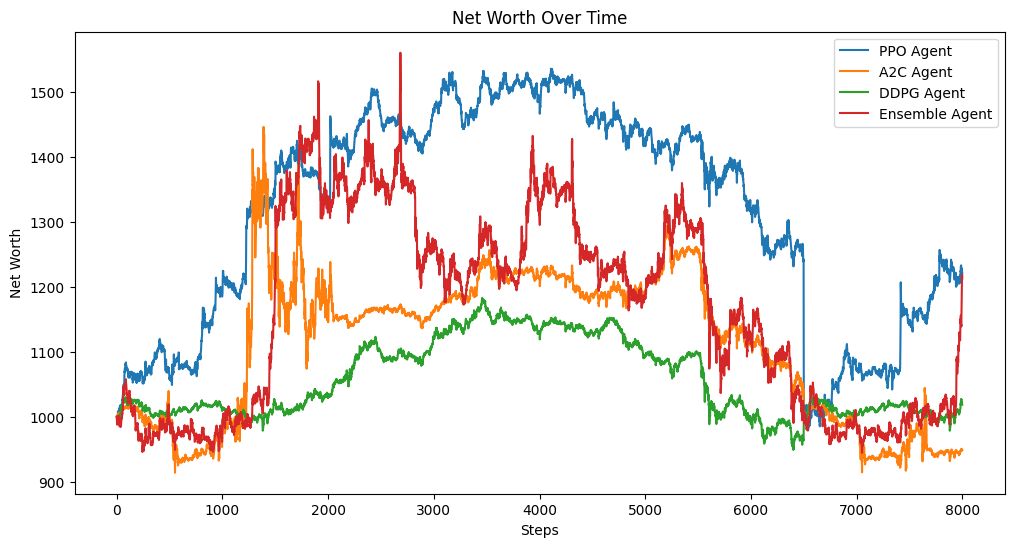

Testing PPO Agent...
Predictions for PPO Agent:
[array([[ 1.        ,  0.40207946,  1.        , -0.35655552,  1.        ,
        -0.575178  , -0.8794737 , -0.57874465, -0.37086293, -1.        ,
        -1.        ,  1.        , -0.18082938,  0.5130364 ,  0.9600213 ,
         1.        , -1.        , -0.72161984,  0.12492767, -0.52818596,
         0.9504557 ,  0.60483927, -0.8366168 , -1.        ,  1.        ,
         1.        , -0.7154306 ,  1.        ,  0.5210011 ]],
      dtype=float32), array([[-0.6759584 , -0.40331692,  1.        ,  0.42876387, -0.17594732,
        -1.        ,  1.        , -1.        ,  1.        , -0.6390432 ,
         0.27241975, -0.9627954 , -0.42828667, -0.01485217,  0.6314809 ,
         0.14667018,  1.        , -1.        ,  0.4519277 ,  0.9371301 ,
         0.06630249,  0.6149014 , -0.45524678, -1.        ,  1.        ,
         1.        , -0.70617056,  0.23459102,  0.11227185]],
      dtype=float32), array([[-1.        ,  1.        , -0.21888784, -0.013

ValueError: Must pass 2-d input. shape=(8000, 1, 29)

In [243]:
# 1. Create environment and train agents
total_timesteps = 200000
env, ppo_agent, a2c_agent, ddpg_agent, ensemble_agent = create_env_and_train_agents(training_data, total_timesteps)

# Kaydetme işlemi eğitim tamamlandığında yapılacak
ppo_agent.model.save("ppo_model")
a2c_agent.model.save("a2c_model")
ddpg_agent.model.save("ddpg_model")

# Ensemble modelini kaydetme
ensemble_agent.ppo_model.save("ensemble_ppo_model")
ensemble_agent.a2c_model.save("ensemble_a2c_model")
ensemble_agent.ddpg_model.save("ensemble_ddpg_model")

# 2. Test & visualize the agents
n_tests = 8000
agents = {
    'PPO Agent': ppo_agent,
    'A2C Agent': a2c_agent,
    'DDPG Agent': ddpg_agent,
    'Ensemble Agent': ensemble_agent
}

# Test ve görselleştirme fonksiyonunu çağırma
test_and_visualize_agents(env, agents, training_data, n_tests=n_tests)

# 3. Ajanların tahminlerini analiz etme
for agent_name, agent in agents.items():
    print(f"Testing {agent_name}...")

    # Test fonksiyonunu çağır ve sonuçları al
    metrics = test_agent(env, agent, training_data, n_tests=n_tests, visualize=False)

    # Tahminlerin ilk 10 adımını yazdır
    print(f"Predictions for {agent_name}:")
    print(metrics['predictions'][:10])  # İlk 10 tahmin
    
    # Tahminleri bir CSV dosyasına kaydetme
    predictions_df = pd.DataFrame(metrics['predictions'], columns=['Prediction'])
    predictions_df.to_csv(f"{agent_name}_predictions.csv", index=False)
    print(f"Predictions for {agent_name} saved to {agent_name}_predictions.csv\n")

print("Testing and prediction logging completed.")



Testing PPO Agent...


/home/faruk/miniconda3/envs/tf-wsl/lib/python3.9/site-packages/stable_baselines3/common/vec_env/base_vec_env.py:243: UserWarning: You tried to call render() but no `render_mode` was passed to the env constructor.
  warnings.warn("You tried to call render() but no `render_mode` was passed to the env constructor.")


Done testing PPO Agent!
Predictions for PPO Agent:
[array([[ 0.44775397,  0.5271652 , -0.97478855,  0.6698565 , -0.08625149,
        -1.        ,  1.        , -1.        , -1.        ,  1.        ,
         0.84091145,  0.61816317, -0.7738885 ,  0.16585189, -0.78534734,
        -1.        ,  0.33513004, -1.        ,  0.32151553,  1.        ,
        -0.24866112,  1.        , -1.        , -0.4983616 ,  1.        ,
        -1.        ,  0.7526225 ,  0.15630361, -1.        ]],
      dtype=float32), array([[ 1.        ,  1.        , -1.        , -1.        ,  0.06959127,
         1.        , -0.37405947, -0.34145248,  1.        , -0.21782511,
        -1.        , -0.2734037 , -0.7695324 ,  1.        ,  0.54604816,
        -1.        , -0.9754245 , -1.        , -1.        ,  0.5428824 ,
        -0.94143724,  0.16875693, -0.15127343,  1.        ,  0.45010823,
        -1.        ,  0.9405209 , -0.4757043 , -1.        ]],
      dtype=float32), array([[-0.8387364 ,  1.        ,  0.7279444 , -0.

/home/faruk/miniconda3/envs/tf-wsl/lib/python3.9/site-packages/stable_baselines3/common/vec_env/base_vec_env.py:243: UserWarning: You tried to call render() but no `render_mode` was passed to the env constructor.
  warnings.warn("You tried to call render() but no `render_mode` was passed to the env constructor.")
/home/faruk/miniconda3/envs/tf-wsl/lib/python3.9/site-packages/stable_baselines3/common/vec_env/base_vec_env.py:243: UserWarning: You tried to call render() but no `render_mode` was passed to the env constructor.
  warnings.warn("You tried to call render() but no `render_mode` was passed to the env constructor.")


Done testing DDPG Agent!
Predictions for DDPG Agent:
[array([[-1., -1., -1., -1., -1., -1.,  1.,  1., -1.,  1., -1.,  1., -1.,
         1., -1.,  1., -1.,  1., -1., -1., -1.,  1.,  1.,  1., -1.,  1.,
        -1.,  1.,  1.]], dtype=float32), array([[-1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1., -1.,  1., -1.,
         1., -1.,  1., -1.,  1., -1., -1., -1.,  1.,  1.,  1., -1.,  1.,
        -1.,  1.,  1.]], dtype=float32), array([[-1., -1., -1., -1., -1., -1.,  1.,  1., -1.,  1., -1.,  1., -1.,
         1., -1.,  1., -1.,  1., -1., -1., -1.,  1.,  1.,  1., -1.,  1.,
        -1.,  1.,  1.]], dtype=float32), array([[-1., -1., -1., -1.,  1., -1.,  1.,  1.,  1.,  1., -1.,  1., -1.,
         1., -1.,  1., -1.,  1.,  1., -1., -1.,  1., -1.,  1., -1.,  1.,
        -1.,  1.,  1.]], dtype=float32), array([[-1., -1., -1., -1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1., -1.,
         1., -1.,  1., -1.,  1., -1., -1., -1.,  1.,  1.,  1., -1.,  1.,
        -1.,  1.,  1.]], dtype=float32), array([[-1.

/home/faruk/miniconda3/envs/tf-wsl/lib/python3.9/site-packages/stable_baselines3/common/vec_env/base_vec_env.py:243: UserWarning: You tried to call render() but no `render_mode` was passed to the env constructor.
  warnings.warn("You tried to call render() but no `render_mode` was passed to the env constructor.")


Done testing Ensemble Agent!
Predictions for Ensemble Agent:
[array([[-0.18428223, -0.05475658, -0.33333334,  0.04672289, -0.4719865 ,
        -1.        ,  0.22825174,  0.94270587, -0.33333334,  0.33333334,
        -0.5184184 ,  0.5816485 , -0.12748878,  0.0594453 , -0.58614963,
         0.46982026,  0.20217995,  0.5936016 , -1.        , -0.8424873 ,
         0.0849475 ,  0.33333334,  1.        , -0.33333334, -0.42078415,
        -0.10564693, -0.86533976, -0.16721201, -0.16105008]],
      dtype=float32), array([[-0.13414617,  0.33333334, -0.47521415,  0.26016912, -0.6569832 ,
        -1.        ,  0.33333334,  0.6633479 ,  0.33333334,  0.33333334,
        -0.44027138, -0.21593149, -0.33333334,  0.33333334, -1.        ,
         0.33333334,  0.12130686, -0.21640699, -0.666718  , -0.42709556,
        -0.33333334,  0.33333334,  1.        , -0.33333334, -0.33333334,
        -0.33333334, -0.9064838 , -0.33333334, -0.26368406]],
      dtype=float32), array([[-0.08610455,  0.33333334, -0.333

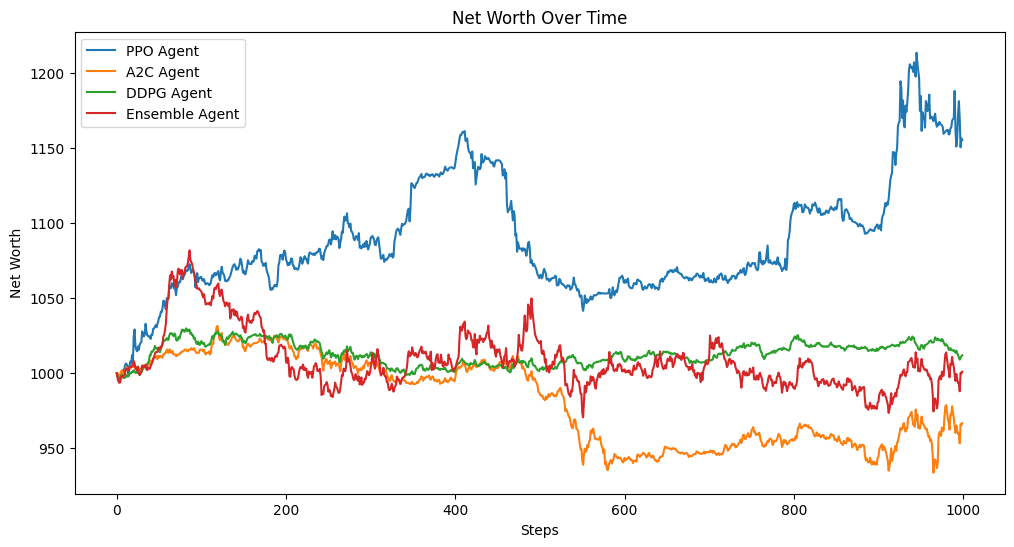

,Agent,Return,Standard Deviation,Sharpe Ratio
2,DDPG Agent,1013.253922,7.600044,133.322107
3,Ensemble Agent,1011.198092,16.254980,62.208512
1,A2C Agent,974.547023,34.830766,27.979488
0,PPO Agent,1067.537232,46.066400,23.173880


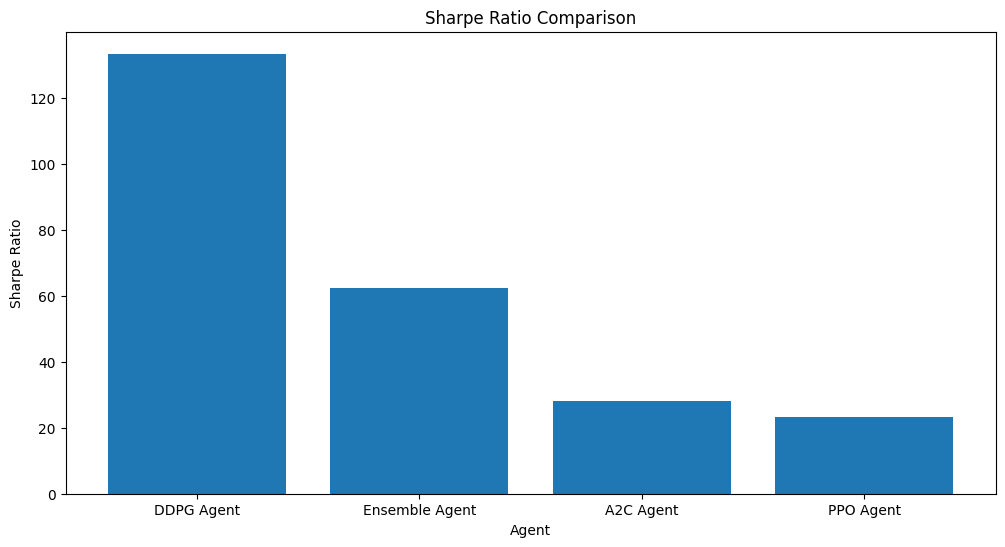

In [244]:
# Create the environment using DummyVecEnv with test data
test_env = DummyVecEnv([lambda: StockTradingEnv(test_data)])

# 2. Test & visualize the agents on the test data
n_tests = 1000
test_agents = {
    'PPO Agent': ppo_agent,
    'A2C Agent': a2c_agent,
    'DDPG Agent': ddpg_agent,
    'Ensemble Agent': ensemble_agent
}
test_and_visualize_agents(env, test_agents, test_data, n_tests=n_tests)

# 3. Compare the agents' performance on the test data ( returns, standard deviation, and sharpe ratio )
test_agents_metrics = [test_agent(env, agent, test_data, n_tests=n_tests, visualize=False) for agent in test_agents.values()]
compare_and_plot_agents(test_agents_metrics, list(test_agents.keys()))

In [5]:
import pandas as pd
import numpy as np
import gymnasium as gym
from stable_baselines3 import PPO
import ccxt
import time
import threading

class LiveCryptoPrediction:
    def __init__(self, model_path, symbols, timeframe='1m', indicator_func=None):
        """
        Canlı kripto tahmin sınıfı
        
        :param model_path: Eğitilmiş modelin yolu
        :param symbols: Takip edilecek kripto sembolleri
        :param timeframe: Veri çekme aralığı
        :param indicator_func: Teknik indikatör fonksiyonu
        """
        # Modeli yükle
        self.model = PPO.load(model_path)
        
        # Binance borsası bağlantısı
        self.exchange = ccxt.binance({
            'enableRateLimit': True,
            'options': {
                'defaultType': 'future'
            }
        })
        
        self.symbols = symbols
        self.timeframe = timeframe
        
        # İndikatör fonksiyonunu ayarla
        self.indicator_func = indicator_func or self._default_indicators
        
        # Başlangıç verilerini çek
        self.crypto_data = self._fetch_initial_data()
        
        # Ortamı başlat
        self.env = StockTradingEnv(self.crypto_data)
        
        # Tahmin değişkenleri
        self.predictions = {}
        self.is_running = False
        self.prediction_lock = threading.Lock()
    
    def _default_indicators(self, df):
        """
        Varsayılan indikatör fonksiyonu
        Eğer kullanıcı kendi fonksiyonunu sağlamazsa
        """
        print("Varsayılan indikatör fonksiyonu kullanılıyor. Kendi fonksiyonunuzu sağlayın.")
        return df
    
    def _fetch_initial_data(self):
        """
        İlk başlangıç verilerini çek ve indikatörleri ekle
        """
        crypto_data = {}
        for symbol in self.symbols:
            # Her sembol için tarihsel veri çek
            ohlcv = self.exchange.fetch_ohlcv(symbol, self.timeframe, limit=500)
            
            # OHLCV verilerini DataFrame'e çevir
            df = pd.DataFrame(ohlcv, columns=['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'])
            df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='ms')
            df.set_index('Timestamp', inplace=True)
            
            # İndikatörleri ekle
            df = self.indicator_func(df)
            
            crypto_data[symbol] = df
        
        return crypto_data
    
    def _update_crypto_data(self):
        """
        Kripto verilerini güncelle ve indikatörleri ekle
        """
        for symbol in self.symbols:
            # En son veriyi çek
            new_ohlcv = self.exchange.fetch_ohlcv(symbol, self.timeframe, limit=10)
            
            # Veriyi DataFrame'e çevir
            new_df = pd.DataFrame(new_ohlcv, columns=['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'])
            new_df['Timestamp'] = pd.to_datetime(new_df['Timestamp'], unit='ms')
            new_df.set_index('Timestamp', inplace=True)
            
            # Mevcut verilerle birleştir
            merged_df = pd.concat([
                self.crypto_data[symbol], 
                new_df[~new_df.index.isin(self.crypto_data[symbol].index)]
            ])
            
            # İndikatörleri ekle
            merged_df = self.indicator_func(merged_df)
            
            # Güncelle
            self.crypto_data[symbol] = merged_df
    
    def predict(self):
        """
        Sürekli tahmin yapma fonksiyonu
        """
        while self.is_running:
            try:
                # Verileri güncelle
                self._update_crypto_data()
                
                # Ortamı güncelle
                self.env.update_stock_data(self.crypto_data)
                
                # Ortamı sıfırla
                obs, _ = self.env.reset()
                
                # Tahmin yap
                action, _ = self.model.predict(obs, deterministic=True)
                
                # Tahminleri kaydet
                with self.prediction_lock:
                    self.predictions = {
                        symbol: action[i] for i, symbol in enumerate(self.symbols)
                    }
                
                # Sonuçları yazdır
                print("\nGüncel Kripto Tahminleri:")
                for symbol, pred in self.predictions.items():
                    print(f"{symbol}: {pred}")
                
                # Belirli bir süre bekle
                time.sleep(60)  # 1 dakikada bir güncelle
            
            except Exception as e:
                print(f"Hata oluştu: {e}")
                time.sleep(60)  # Hata durumunda bile belirli aralıklarla dene
    
    def start_prediction(self):
        """
        Tahmin işlemini başlat
        """
        if not self.is_running:
            self.is_running = True
            self.prediction_thread = threading.Thread(target=self.predict)
            self.prediction_thread.start()
            print("Kripto tahmin işlemi başlatıldı.")
    
    def stop_prediction(self):
        """
        Tahmin işlemini durdur
        """
        self.is_running = False
        if hasattr(self, 'prediction_thread'):
            self.prediction_thread.join()
        print("Kripto tahmin işlemi durduruldu.")
    
    def get_latest_predictions(self):
        """
        En son tahminleri al
        """
        with self.prediction_lock:
            return self.predictions.copy()

def main():
    # Örnek kullanım
    predictor = LiveCryptoPrediction(
        model_path='ppo4_model.zip',
        symbols=['BTC/USDT', 'ETH/USDT', 'XRP/USDT'],
        indicator_func=add_technical_indicators  # Kendi indikatör fonksiyonunuzu ekleyin
    )
    
    try:
        # Tahmin işlemini başlat
        predictor.start_prediction()
        
        # İstediğiniz kadar çalıştırabilirsiniz
        while True:
            time.sleep(300)  # 5 dakikada bir manuel kontrol
            
            # Son tahminleri al
            latest_predictions = predictor.get_latest_predictions()
            print("\nSon Kripto Tahminleri Özeti:")
            for symbol, pred in latest_predictions.items():
                print(f"{symbol}: {pred}")
    
    except KeyboardInterrupt:
        predictor.stop_prediction()

def add_technical_indicators(df):
    # RSI 14
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0).rolling(window=14).mean()
    loss = -delta.where(delta < 0, 0).rolling(window=14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))

    # MACD
    df['EMA12'] = df['Close'].ewm(span=12, adjust=False).mean()
    df['EMA26'] = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = df['EMA12'] - df['EMA26']
    df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

    # CCI 20
    tp = (df['High'] + df['Low'] + df['Close']) / 3
    sma_tp = tp.rolling(window=20).mean()
    mean_dev = tp.rolling(window=20).apply(lambda x: np.mean(np.abs(x - x.mean())), raw=True)
    df['CCI'] = (tp - sma_tp) / (0.015 * mean_dev)

    # ADX 14
    high_diff = df['High'].diff()
    low_diff = df['Low'].diff()
    df['+DM'] = np.where((high_diff > low_diff) & (high_diff > 0), high_diff, 0)
    df['-DM'] = np.where((low_diff > high_diff) & (low_diff > 0), low_diff, 0)
    tr = pd.concat([
        df['High'] - df['Low'], 
        np.abs(df['High'] - df['Close'].shift(1)), 
        np.abs(df['Low'] - df['Close'].shift(1))
    ], axis=1).max(axis=1)
    atr = tr.ewm(span=14, adjust=False).mean()
    df['+DI'] = 100 * (df['+DM'].ewm(span=14, adjust=False).mean() / atr)
    df['-DI'] = 100 * (df['-DM'].ewm(span=14, adjust=False).mean() / atr)
    dx = 100 * np.abs(df['+DI'] - df['-DI']) / (df['+DI'] + df['-DI'])
    df['ADX'] = dx.ewm(span=14, adjust=False).mean()

    # Gereksiz sütunları çıkar ve NaN değerleri sil
    df.drop(columns=['EMA12', 'EMA26', '+DM', '-DM'], inplace=True)
    df.dropna(inplace=True)

    # İlgili sütunları seç
    df = df[['Open', 'High', 'Low', 'Close', 'Volume', 'MACD', 'Signal', 'RSI', 'CCI', 'ADX']]
    
    return df


def calculate_rsi(close_prices, periods=14):
    """
    Basit RSI hesaplama fonksiyonu
    """
    delta = close_prices.diff()
    
    gain = (delta.where(delta > 0, 0)).rolling(window=periods).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=periods).mean()
    
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    
    return rsi

if __name__ == "__main__":
    main()

2024-12-02 19:28:27.829482: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-02 19:28:28.618999: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-02 19:28:28.904325: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-02 19:28:29.002497: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-02 19:28:29.601542: I tensorflow/core/platform/cpu_feature_guar

NameError: name 'StockTradingEnv' is not defined

In [245]:
import pandas as pd
import numpy as np
import gymnasium as gym
from stable_baselines3 import PPO
import ccxt
import time
import threading

class LiveCryptoPrediction:
    def __init__(self, model_path, symbols, timeframe='3m', indicator_func=None):
        """
        Canlı kripto tahmin sınıfı
        
        :param model_path: Eğitilmiş modelin yolu
        :param symbols: Takip edilecek kripto sembolleri
        :param timeframe: Veri çekme aralığı
        :param indicator_func: Teknik indikatör fonksiyonu
        """
        try:
            # Modeli yükle
            self.model = PPO.load(model_path)
        
            # Binance borsası bağlantısı
            self.exchange = ccxt.binance({
                'enableRateLimit': True,
                'options': {
                    'defaultType': 'future'
                }
            })
        
            self.symbols = symbols
            self.timeframe = timeframe
        
            # İndikatör fonksiyonunu ayarla
            self.indicator_func = indicator_func or self._default_indicators
        
            # Başlangıç verilerini çek
            self.crypto_data = self._fetch_initial_data()
        
            # Ortamı başlat
            self.env = StockTradingEnv2(self.crypto_data)
        
            # Tahmin değişkenleri
            self.predictions = {}
            self.is_running = False
            self.prediction_lock = threading.Lock()
        
        except Exception as e:
            print(f"Başlatma sırasında hata: {e}")
            raise
    
    
    
    def _fetch_initial_data(self):
        """
        İlk başlangıç verilerini çek ve indikatörleri ekle
        """
        crypto_data = {}
        for symbol in self.symbols:
            try:
                # Her sembol için tarihsel veri çek
                ohlcv = self.exchange.fetch_ohlcv(symbol, self.timeframe, limit=500)
                
                # OHLCV verilerini DataFrame'e çevir
                df = pd.DataFrame(ohlcv, columns=['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'])
                df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='ms')
                df.set_index('Timestamp', inplace=True)
                
                # İndikatörleri ekle
                df = add_technical_indicators(df)
                
                crypto_data[symbol] = df
            
            except Exception as e:
                print(f"{symbol} için veri çekme hatası: {e}")
        
        return crypto_data
    
    def _update_crypto_data(self):
        """
        Kripto verilerini güncelle ve indikatörleri ekle
        """
        for symbol in self.symbols:
            try:
                # En son veriyi çek
                new_ohlcv = self.exchange.fetch_ohlcv(symbol, self.timeframe, limit=10)
                
                # Veriyi DataFrame'e çevir
                new_df = pd.DataFrame(new_ohlcv, columns=['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'])
                new_df['Timestamp'] = pd.to_datetime(new_df['Timestamp'], unit='ms')
                new_df.set_index('Timestamp', inplace=True)
                
                # Mevcut verilerle birleştir
                merged_df = pd.concat([
                    self.crypto_data[symbol], 
                    new_df[~new_df.index.isin(self.crypto_data[symbol].index)]
                ])
                
                # İndikatörleri ekle
                merged_df = add_technical_indicators(merged_df)
                
                # Güncelle
                self.crypto_data[symbol] = merged_df
            
            except Exception as e:
                print(f"{symbol} için veri güncelleme hatası: {e}")
    
    def predict(self):
        """
        Sürekli tahmin yapma fonksiyonu
        """
        while self.is_running:
            try:
                # Verileri güncelle
                self._update_crypto_data()
                
                # Ortamı güncelle
                self.env.update_stock_data(self.crypto_data)
                
                # Ortamı sıfırla
                obs, _ = self.env.reset()
                
                # Tahmin yap
                action, _ = self.model.predict(obs)
                
                # Tahminleri kaydet
                with self.prediction_lock:
                    self.predictions = {
                        symbol: action[i] for i, symbol in enumerate(self.symbols)
                    }
                
                # Sonuçları yazdır
                print("\nGüncel Kripto Tahminleri:")
                for symbol, pred in self.predictions.items():
                    print(f"{symbol}: {pred}")
                
                # Belirli bir süre bekle
                time.sleep(60)  # 1 dakikada bir güncelle
            
            except Exception as e:
                print(f"Tahmin sırasında hata: {e}")
                time.sleep(60)  # Hata durumunda bile belirli aralıklarla dene
    
    def start_prediction(self):
        """
        Tahmin işlemini başlat
        """
        if not self.is_running:
            self.is_running = True
            self.prediction_thread = threading.Thread(target=self.predict)
            self.prediction_thread.start()
            print("Kripto tahmin işlemi başlatıldı.")
    
    def stop_prediction(self):
        """
        Tahmin işlemini durdur
        """
        self.is_running = False
        if hasattr(self, 'prediction_thread'):
            self.prediction_thread.join()
        print("Kripto tahmin işlemi durduruldu.")
    
    def get_latest_predictions(self):
        """
        En son tahminleri al
        """
        with self.prediction_lock:
            return self.predictions.copy()

def add_technical_indicators(df):
    # RSI 14
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0).rolling(window=14).mean()
    loss = -delta.where(delta < 0, 0).rolling(window=14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))

    # MACD
    df['EMA12'] = df['Close'].ewm(span=12, adjust=False).mean()
    df['EMA26'] = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = df['EMA12'] - df['EMA26']
    df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

    # CCI 20
    tp = (df['High'] + df['Low'] + df['Close']) / 3
    sma_tp = tp.rolling(window=20).mean()
    mean_dev = tp.rolling(window=20).apply(lambda x: np.mean(np.abs(x - x.mean())), raw=True)
    df['CCI'] = (tp - sma_tp) / (0.015 * mean_dev)

    # ADX 14
    high_diff = df['High'].diff()
    low_diff = df['Low'].diff()
    df['+DM'] = np.where((high_diff > low_diff) & (high_diff > 0), high_diff, 0)
    df['-DM'] = np.where((low_diff > high_diff) & (low_diff > 0), low_diff, 0)
    tr = pd.concat([
        df['High'] - df['Low'], 
        np.abs(df['High'] - df['Close'].shift(1)), 
        np.abs(df['Low'] - df['Close'].shift(1))
    ], axis=1).max(axis=1)
    atr = tr.ewm(span=14, adjust=False).mean()
    df['+DI'] = 100 * (df['+DM'].ewm(span=14, adjust=False).mean() / atr)
    df['-DI'] = 100 * (df['-DM'].ewm(span=14, adjust=False).mean() / atr)
    dx = 100 * np.abs(df['+DI'] - df['-DI']) / (df['+DI'] + df['-DI'])
    df['ADX'] = dx.ewm(span=14, adjust=False).mean()

    # Gereksiz sütunları çıkar ve NaN değerleri sil
    df.drop(columns=['EMA12', 'EMA26', '+DM', '-DM'], inplace=True)
    df.dropna(inplace=True)

    # İlgili sütunları seç
    df = df[['Open', 'High', 'Low', 'Close', 'Volume', 'MACD', 'Signal', 'RSI', 'CCI', 'ADX']]
    
    return df

def main():
    # Örnek kullanım
    predictor = LiveCryptoPrediction(
        model_path='ppo4_model.zip',
        symbols=['BTC/USDT', 'ETH/USDT', 'XRP/USDT'],
        indicator_func=add_technical_indicators
    )
    
    try:
        # Tahmin işlemini başlat
        predictor.start_prediction()
        
        # İstediğiniz kadar çalıştırabilirsiniz
        while True:
            time.sleep(300)  # 5 dakikada bir manuel kontrol
            
            # Son tahminleri al
            latest_predictions = predictor.get_latest_predictions()
            print("\nSon Kripto Tahminleri Özeti:")
            for symbol, pred in latest_predictions.items():
                print(f"{symbol}: {pred}")
    
    except KeyboardInterrupt:
        predictor.stop_prediction()

if __name__ == "__main__":
    main()

/home/faruk/miniconda3/envs/tf-wsl/lib/python3.9/site-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


Kripto tahmin işlemi başlatıldı.
Ortam, 3 yeni hisse senediyle güncellendi.

Güncel Kripto Tahminleri:
BTC/USDT: 1.0
ETH/USDT: -0.21332889795303345
XRP/USDT: -0.04313464090228081


KeyboardInterrupt: 

In [4]:
import gymnasium as gym
import numpy as np
import spaces

class StockTradingEnv2(gym.Env):
    metadata = {'render_modes': ['human']}
    
    def __init__(self, stock_data):
        super(StockTradingEnv2, self).__init__()
        
        # Boş DataFrame'leri kaldır
        self.stock_data = {ticker: df for ticker, df in stock_data.items() if not df.empty}
        self.tickers = list(self.stock_data.keys())
        
        if not self.tickers:
            raise ValueError("Verilen tüm hisse senedi verileri boş")
        
        # Bir hisse senedinin veri boyutunu hesapla
        sample_df = next(iter(self.stock_data.values()))
        self.n_features = len(sample_df.columns)
        
        # Aksiyon ve gözlem alanlarını tanımla
        self.action_space = spaces.Box(low=-1, high=1, shape=(len(self.tickers),), dtype=np.float32)
        
        # Gözlem alanını 224 boyutuna sabitle
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(410,), dtype=np.float32)
        
        # Hesap bakiyesini başlat
        self.initial_balance = 1000
        self.balance = self.initial_balance
        self.net_worth = self.initial_balance
        self.max_net_worth = self.initial_balance
        self.shares_held = {ticker: 0 for ticker in self.tickers}
        self.total_shares_sold = {ticker: 0 for ticker in self.tickers}
        self.total_sales_value = {ticker: 0 for ticker in self.tickers}
        
        # Mevcut adımı ayarla
        self.current_step = 0
        
        # Tüm hisse senetleri için veri uzunluğunun minimum olanını hesapla
        self.max_steps = max(0, min(len(df) for df in self.stock_data.values()) - 1)
    
    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.balance = self.initial_balance
        self.net_worth = self.initial_balance
        self.max_net_worth = self.initial_balance
        self.shares_held = {ticker: 0 for ticker in self.tickers}
        self.total_shares_sold = {ticker: 0 for ticker in self.tickers}
        self.total_sales_value = {ticker: 0 for ticker in self.tickers}
        self.current_step = 0
        return self._next_observation(), {}
    
    def _next_observation(self):
        # Gözlem boyutunu kesinlikle 224'e sabitle
        frame = np.zeros(410, dtype=np.float32)
        
        idx = 0
        for ticker in self.tickers:
            df = self.stock_data[ticker]
            if self.current_step < len(df):
                # Son 20 özelliği al
                row_data = df.iloc[self.current_step].values
            elif len(df) > 0:
                row_data = df.iloc[-1].values
            else:
                continue

            # Her sembol için 20 özellik ayır
            current_row_length = min(len(row_data), 20)
            frame[idx:idx+current_row_length] = row_data[:current_row_length]
            idx += 20
        
        return frame
    
    def step(self, actions):
        self.current_step += 1
        
        if self.current_step > self.max_steps:
            return self._next_observation(), 0, True, False, {}
        
        current_prices = {}
        for i, ticker in enumerate(self.tickers):
            current_prices[ticker] = self.stock_data[ticker].iloc[self.current_step]['Close']
            action = actions[i]
            
            if action > 0:  # Satın al
                shares_to_buy = int(self.balance * action / current_prices[ticker])
                cost = shares_to_buy * current_prices[ticker]
                self.balance -= cost
                self.shares_held[ticker] += shares_to_buy
            elif action < 0:  # Sat
                shares_to_sell = int(self.shares_held[ticker] * abs(action))
                sale = shares_to_sell * current_prices[ticker]
                self.balance += sale
                self.shares_held[ticker] -= shares_to_sell
                self.total_shares_sold[ticker] += shares_to_sell
                self.total_sales_value[ticker] += sale
        
        self.net_worth = self.balance + sum(self.shares_held[ticker] * current_prices[ticker] for ticker in self.tickers)
        self.max_net_worth = max(self.net_worth, self.max_net_worth)
        
        reward = self.net_worth - self.initial_balance
        done = self.net_worth <= 0 or self.current_step >= self.max_steps
        
        obs = self._next_observation()
        return obs, reward, done, False, {}
    
    def render(self, mode='human'):
        profit = self.net_worth - self.initial_balance
        print(f'Aşama: {self.current_step}')
        print(f'Bakiye: {self.balance:.2f}')
        for ticker in self.tickers:
            print(f'{ticker} Hisseleri: {self.shares_held[ticker]}')
        print(f'Net Değer: {self.net_worth:.2f}')
        print(f'Kar: {profit:.2f}')

    def close(self):
        pass

    def update_stock_data(self, new_stock_data):
        self.stock_data = {ticker: df for ticker, df in new_stock_data.items() if not df.empty}
        self.tickers = list(self.stock_data.keys())

        if not self.tickers:
            raise ValueError("Tüm yeni hisse senedi verileri boş")

        sample_df = next(iter(self.stock_data.values()))
        self.n_features = len(sample_df.columns)

        # Maksimum adım sayısını güncelle
        self.max_steps = max(0, min(len(df) for df in self.stock_data.values()) - 1)

        # Ortamı sıfırla
        self.reset()

        print(f"Ortam, {len(self.tickers)} yeni hisse senediyle güncellendi.")

In [7]:
import pandas as pd
import numpy as np
import gymnasium as gym
from stable_baselines3 import PPO
import ccxt
import time
import threading
from gymnasium import spaces

class LiveCryptoPrediction:
    def __init__(self, model_path, symbols, timeframe='3m',indicator_func=None):
        """
        Canlı kripto tahmin sınıfı
        
        :param model_path: Eğitilmiş modelin yolu
        :param symbols: Takip edilecek kripto sembolleri
        :param timeframe: Veri çekme aralığı
        :param indicator_func: Teknik indikatör fonksiyonu
        """
        try:
            # Modeli yükle
            self.model = PPO.load(model_path)
        
            # Binance borsası bağlantısı
            self.exchange = ccxt.binance({
                'enableRateLimit': True,
                'options': {
                    'defaultType': 'spot'
                }
            })
        
            self.symbols = symbols
            self.timeframe = timeframe
        
            # İndikatör fonksiyonunu ayarla
            self.indicator_func = add_technical_indicators
        
            # Başlangıç verilerini çek
            self.crypto_data = self._fetch_initial_data()
        
            # Ortamı başlat
            self.env = StockTradingEnv2(self.crypto_data)
        
            # Tahmin değişkenleri
            self.predictions = {}
            self.is_running = False
            self.prediction_lock = threading.Lock()
        
        except Exception as e:
            print(f"Başlatma sırasında hata: {e}")
            raise
    
    def update_symbols(self, new_symbols):
    
        try:
        # Yeni sembolleri güncelle
            usdt_symbols = [symbol for symbol in new_symbols if symbol.endswith('USDT')]
            self.symbols = usdt_symbols

        
        # Başlangıç verilerini yeni sembollerle tekrar çek
            self.crypto_data = self._fetch_initial_data()
        
        # Ortamı güncelle
            self.env.update_stock_data(self.crypto_data)
        
            print(f"Semboller güncellendi: {new_symbols}")
    
        except Exception as e:
            print(f"Sembol güncelleme hatası: {e}")
    
    def _fetch_initial_data(self):
        """
        İlk başlangıç verilerini çek ve indikatörleri ekle
        """
        crypto_data = {}
        for symbol in self.symbols:
            if symbol.endswith('USDT'):
                try:
                # Her sembol için tarihsel veri çek
                    ohlcv = self.exchange.fetch_ohlcv(symbol, self.timeframe, limit=80)
                
                # OHLCV verilerini DataFrame'e çevir
                    df = pd.DataFrame(ohlcv, columns=['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'])
                    df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='ms')
                    df.set_index('Timestamp', inplace=True)
                
                # İndikatörleri ekle
                    df = add_technical_indicators(df)
                
                    crypto_data[symbol] = df
            
                except Exception as e:
                    print(f"{symbol} için veri çekme hatası: {e}")
        
        return crypto_data
    
    def _update_crypto_data(self):
        """
        Kripto verilerini güncelle ve indikatörleri ekle
        """
        for symbol in self.symbols:
            if symbol.endswith('USDT'):
                try:
                # En son veriyi çek
                    new_ohlcv = self.exchange.fetch_ohlcv(symbol, self.timeframe, limit=80)
                
                # Veriyi DataFrame'e çevir
                    new_df = pd.DataFrame(new_ohlcv, columns=['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'])
                    new_df['Timestamp'] = pd.to_datetime(new_df['Timestamp'], unit='ms')
                    new_df.set_index('Timestamp', inplace=True)
                
                # Mevcut verilerle birleştir
                    merged_df = pd.concat([
                        self.crypto_data[symbol], 
                        new_df[~new_df.index.isin(self.crypto_data[symbol].index)]
                    ])
                
                # İndikatörleri ekle
                    merged_df = add_technical_indicators(merged_df)
                
                # Güncelle
                    self.crypto_data[symbol] = merged_df
            
                except Exception as e:
                    print(f"{symbol} için veri güncelleme hatası: {e}")
    
    def predict(self):
        """
        Sürekli tahmin yapma fonksiyonu
        """
        while self.is_running:
            try:
                # Verileri güncelle
                self._update_crypto_data()
                
                # Ortamı güncelle
                self.env.update_stock_data(self.crypto_data)
                
                # Ortamı sıfırla
                obs, _ = self.env.reset()
                
                # Tahmin yap
                action, _ = self.model.predict(obs)
                
                # Tahminleri kaydet
                with self.prediction_lock:
                    self.predictions = {
                        symbol: action[i] for i, symbol in enumerate(self.symbols)
                    }
                
                # Sonuçları yazdır
                print("\nGüncel Kripto Tahminleri:")
                for symbol, pred in self.predictions.items():
                    print(f"{symbol}: {pred}")
                
                # Belirli bir süre bekle
                time.sleep(180)  # 5 dakikada bir güncelle
            
            except Exception as e:  
                print(f"Tahmin sırasında hata: {e}")
                time.sleep(60)  # Hata durumunda bile belirli aralıklarla dene
    
    def start_prediction(self):
        """
        Tahmin işlemini başlat
        """
        if not self.is_running:
            self.is_running = True
            self.prediction_thread = threading.Thread(target=self.predict)
            self.prediction_thread.start()
            print("Kripto tahmin işlemi başlatıldı.")
    
    def stop_prediction(self):
        """
        Tahmin işlemini durdur
        """
        self.is_running = False
        if hasattr(self, 'prediction_thread'):
            self.prediction_thread.join()
        print("Kripto tahmin işlemi durduruldu.")
    
    def get_latest_predictions(self):
        """
        En son tahminleri al
        """
        with self.prediction_lock:
            return self.predictions.copy()

def add_technical_indicators(df):
    # Kopya oluştur
    df = df.copy()

    # RSI 14
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0).rolling(window=14).mean()
    loss = -delta.where(delta < 0, 0).rolling(window=14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))

    # EMA 5, 8, 13
    df['EMA_5'] = df['Close'].ewm(span=5, adjust=False).mean()
    df['EMA_8'] = df['Close'].ewm(span=8, adjust=False).mean()
    df['EMA_13'] = df['Close'].ewm(span=13, adjust=False).mean()

    # MACD
    df['EMA12'] = df['Close'].ewm(span=12, adjust=False).mean()
    df['EMA26'] = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = df['EMA12'] - df['EMA26']
    df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

    # CCI 20
    tp = (df['High'] + df['Low'] + df['Close']) / 3
    sma_tp = tp.rolling(window=20).mean()
    mean_dev = tp.rolling(window=20).apply(lambda x: np.mean(np.abs(x - x.mean())), raw=True)
    df['CCI'] = (tp - sma_tp) / (0.015 * mean_dev)

    # ADX 14
    high_diff = df['High'].diff()
    low_diff = df['Low'].diff()
    df['+DM'] = np.where((high_diff > low_diff) & (high_diff > 0), high_diff, 0)
    df['-DM'] = np.where((low_diff > high_diff) & (low_diff > 0), low_diff, 0)
    tr = pd.concat([
        df['High'] - df['Low'], 
        np.abs(df['High'] - df['Close'].shift(1)), 
        np.abs(df['Low'] - df['Close'].shift(1))
    ], axis=1).max(axis=1)
    atr = tr.ewm(span=14, adjust=False).mean()
    df['+DI'] = 100 * (df['+DM'].ewm(span=14, adjust=False).mean() / atr)
    df['-DI'] = 100 * (df['-DM'].ewm(span=14, adjust=False).mean() / atr)
    dx = 100 * np.abs(df['+DI'] - df['-DI']) / (df['+DI'] + df['-DI'])
    df['ADX'] = dx.ewm(span=14, adjust=False).mean()

    # Gereksiz sütunları çıkar
    df.drop(columns=['EMA12', 'EMA26', '+DM', '-DM'], inplace=True)

    # NaN değerlerini kontrol edin
    if len(df) > 40:  # Minimum satır sayısı
        df.dropna(inplace=True)
    else:
        print("Warning: Not enough data for technical indicators.")
        return df

    # İlgili sütunları seç
    df = df[['Open', 'High', 'Low', 'Close', 'Volume', 'MACD', 'Signal', 'RSI', 'CCI', 'ADX', 'EMA_5', 'EMA_8', 'EMA_13']]

    return df






In [8]:
import pandas as pd
import numpy as np
import ccxt
import time
import logging
from datetime import datetime
import json
import os

class AdvancedCryptoTrader:
    def __init__(self, 
                 symbols=['BTC/USDT', 'ETH/USDT'], 
                 initial_balance=1000, 
                 leverage=1, 
                 risk_percentage=0.02,
                 log_dir='trading_logs',
                 timeframe='3m',
                 ):
        
        # Exchange and authentication settings
        self.exchange = ccxt.binance({
            'enableRateLimit': True,
            'options': {
                'defaultType': 'spot'
            }
        })
        
        # Trading parameters
        self.symbols = symbols
        self.initial_balance = initial_balance
        self.current_balance = initial_balance
        self.leverage = leverage
        self.risk_percentage = risk_percentage
        self.timeframe = timeframe
        
        # Fetch initial crypto data
        self.crypto_data = self._fetch_initial_data()
        
        # Position and strategy variables
        self.positions = {symbol: {
            'amount': 0, 
            'entry_price': 0, 
            'side': None, 
            'ema_confirmation': False
        } for symbol in symbols}
        self.trade_history = []
        
        # Logging setup
        self.log_dir = log_dir
        os.makedirs(log_dir, exist_ok=True)
        
        # Log file
        log_file = os.path.join(log_dir, f'trading_log_{datetime.now().strftime("%Y%m%d_%H%M%S")}.log')
        logging.basicConfig(
            filename=log_file, 
            level=logging.INFO, 
            format='%(asctime)s - %(message)s'
        )
        
        logging.info(f"Trading started. Initial balance: {initial_balance} USDT")
    
    def _fetch_initial_data(self):
        """
        Fetch initial historical data for symbols and add technical indicators
        """
        crypto_data = {}
        for symbol in self.symbols:
            try:
                # Fetch historical data for each symbol
                ohlcv = self.exchange.fetch_ohlcv(symbol, self.timeframe, limit=100)
                
                # Convert OHLCV data to DataFrame
                df = pd.DataFrame(ohlcv, columns=['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'])
                df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='ms')
                df.set_index('Timestamp', inplace=True)
                
                # Add technical indicators
                df = self._add_technical_indicators(df)
                
                crypto_data[symbol] = df
            
            except Exception as e:
                print(f"Error fetching data for {symbol}: {e}")
                # Create an empty DataFrame if data fetch fails
                crypto_data[symbol] = pd.DataFrame(columns=['Close'])
        
        return crypto_data

    def _add_technical_indicators(self, df):
        """
        Add technical indicators to the DataFrame
        """
        if len(df) < 20:
            return df

        df = df.copy()

        # RSI 14
        delta = df['Close'].diff()
        gain = delta.where(delta > 0, 0).rolling(window=14).mean()
        loss = -delta.where(delta < 0, 0).rolling(window=14).mean()
        rs = gain / loss
        df['RSI'] = 100 - (100 / (1 + rs))

        # EMA 5, 8, 13
        df['EMA_5'] = df['Close'].ewm(span=5, adjust=False).mean()
        df['EMA_8'] = df['Close'].ewm(span=8, adjust=False).mean()
        df['EMA_13'] = df['Close'].ewm(span=13, adjust=False).mean()

        # Remove NaN values
        df.dropna(inplace=True)

        return df
    
    def calculate_position_size(self, current_price):
        """Calculate position size with risk management"""
        risk_amount = self.current_balance * self.risk_percentage
        position_size = risk_amount / current_price
        return position_size
    
    def check_stop_loss(self, symbol, current_price):
        """Stop loss check"""
        position = self.positions[symbol]
        if position['side'] == 'long':
            stop_loss_price = position['entry_price'] * 0.995  # 2% stop loss
            if current_price <= stop_loss_price:
                return True
        elif position['side'] == 'short':
            stop_loss_price = position['entry_price'] * 1.005  # 2% stop loss
            if current_price >= stop_loss_price:
                return True
        return False
    
    def check_profit(self, symbol, current_price):
        """Check for 0.5% profit"""
        position = self.positions[symbol]
        if position['side'] == 'long':
            profit_percentage = (current_price - position['entry_price']) / position['entry_price'] * 100
            return profit_percentage >= 0.5  # 0.5% = 0.5%
        elif position['side'] == 'short':
            profit_percentage = (position['entry_price'] - current_price) / position['entry_price'] * 100
            return profit_percentage >= 0.5  # 0.5% = 0.5%
        return False
    
    def _check_ema_condition(self, symbol, current_price):
        """Check EMA conditions for trading signal"""
        df = self.crypto_data[symbol].copy()
        df = df.tail(5)

        df['EMA_5'] = df['Close'].ewm(span=5, adjust=False).mean()
        df['EMA_8'] = df['Close'].ewm(span=8, adjust=False).mean()
        df['EMA_13'] = df['Close'].ewm(span=13, adjust=False).mean()

        bullish_condition = (
            df['EMA_5'].iloc[-1] > df['EMA_8'].iloc[-1] and 
            df['EMA_5'].iloc[-1] > df['EMA_13'].iloc[-1]
        )       

    # Aşağı crossover (bearish sinyal) - EMA_5 diğer EMA'ları aşağıdan kesiyor
        bearish_condition = (
            df['EMA_5'].iloc[-1] < df['EMA_8'].iloc[-1] and 
            df['EMA_5'].iloc[-1] < df['EMA_13'].iloc[-1]
        )
    
        if bullish_condition:
            return 1
        elif bearish_condition:
            return -1
        else:
            return None 
    
    def execute_trade(self, symbol, prediction, current_price):
        """Execute trade based on prediction and current price"""
        if prediction is None:
            return

        # Transaction fee (usually 0.1% for Binance spot)
        fee_rate = 0.001

        # Check current position and prediction value
        position = self.positions[symbol]
        ema_signal = self._check_ema_condition(symbol, current_price)

        # Stop loss check
        if position['side'] and self.check_stop_loss(symbol, current_price):
            self.close_position(symbol, current_price)
            return

        # Close position if profit is over 0.5%
        if position['side'] and self.check_profit(symbol, current_price):
            self.close_position(symbol, current_price)
            return

        # Long position logic
        if prediction == 1 and ema_signal == 1 and position['side'] != 'long':
            # Open long position
            if position['side'] == 'short':
                self.close_position(symbol, current_price)

            position_size = self.calculate_position_size(current_price)
            trade_value = position_size * current_price

            # Check balance after transaction fee
            if trade_value * (1 + fee_rate) <= self.current_balance:
                self.current_balance -= trade_value * (1 + fee_rate)
                position['amount'] = position_size
                position['entry_price'] = current_price
                position['side'] = 'long'
                position['ema_confirmation'] = True

                trade_log = {
                    'symbol': symbol,
                    'side': 'long',
                    'amount': position_size,
                    'price': current_price,
                    'timestamp': datetime.now().isoformat()
                }
                self.trade_history.append(trade_log)
                logging.info(f"Long opened: {trade_log}")

        # Short position logic
        elif prediction == -1 and ema_signal == -1 and position['side'] != 'short':
            # Open short position
            if position['side'] == 'long':
                self.close_position(symbol, current_price)

            position_size = self.calculate_position_size(current_price)
            trade_value = position_size * current_price

            # Check balance after transaction fee
            if trade_value * (1 + fee_rate) <= self.current_balance:
                self.current_balance -= trade_value * (1 + fee_rate)
                position['amount'] = position_size
                position['entry_price'] = current_price
                position['side'] = 'short'
                position['ema_confirmation'] = True

                trade_log = {
                    'symbol': symbol,
                    'side': 'short',
                    'amount': position_size,
                    'price': current_price,
                    'timestamp': datetime.now().isoformat()
                }
                self.trade_history.append(trade_log)
                logging.info(f"Short opened: {trade_log}")
    
    def close_position(self, symbol, current_price):
        """Close open position"""
        position = self.positions[symbol]
        fee_rate = 0.001
        
        if position['side'] == 'long':
            # Close long position
            trade_value = position['amount'] * current_price
            self.current_balance += trade_value * (1 - fee_rate)
            profit = (current_price - position['entry_price']) * position['amount']
        
        elif position['side'] == 'short':
            # Close short position
            trade_value = position['amount'] * current_price
            self.current_balance += trade_value * (1 - fee_rate)
            profit = (position['entry_price'] - current_price) * position['amount']
        
        # Save position log
        close_log = {
            'symbol': symbol,
            'side': position['side'],
            'close_price': current_price,
            'profit': profit,
            'timestamp': datetime.now().isoformat(),
        }
        
        logging.info(f"Position closed: {close_log}")
        
        # Reset position
        position['amount'] = 0
        position['entry_price'] = 0
        position['side'] = None
        position['ema_confirmation'] = False
    
    def save_daily_report(self):
        """Save daily report as JSON"""
        report = {
            'date': datetime.now().isoformat(),
            'initial_balance': self.initial_balance,
            'current_balance': self.current_balance,
            'profit_loss': self.current_balance - self.initial_balance,
            'trade_history': self.trade_history
        }
        
        report_file = os.path.join(
            self.log_dir, 
            f'daily_report_{datetime.now().strftime("%Y%m%d")}.json'
        )
        
        with open(report_file, 'w') as f:
            json.dump(report, f, indent=4)
        
        logging.info(f"Daily report saved: {report_file}")

def main():
    try:
        # This section seems incomplete. You would need to implement or import 
        # the LiveCryptoPrediction class which is not defined in this code.
        predictor = LiveCryptoPrediction(
            model_path='ppo_model.zip',
            symbols=[
               'PEPE/USDT', 'PNUT/USDT', 'ACT/USDT', 'XLM/USDT', 
                'ADA/USDT','ENA/USDT',  'WIF/USDT', 'ALGO/USDT',  
                'SHIB/USDT', 'BONK/USDT','ARB/USDT','TIA/USDT',
                'THE/USDT','HBAR/USDT','WLD/USDT','SUI/USDT',
                'DOT/USDT','ENS/USDT','FET/USDT','NEIRO/USDT'
                
            ]
        )
        
        trader = AdvancedCryptoTrader(
            symbols=[
                
                'PEPE/USDT', 'PNUT/USDT', 'ACT/USDT', 'XLM/USDT', 
                'ADA/USDT','ENA/USDT',  'WIF/USDT', 'ALGO/USDT',  
                'SHIB/USDT', 'BONK/USDT','ARB/USDT','TIA/USDT',
                'THE/USDT','HBAR/USDT','WLD/USDT','SUI/USDT',
                'DOT/USDT','ENS/USDT','FET/USDT','NEIRO/USDT'
                
            ], 
            initial_balance=1000,
            leverage=1,
            risk_percentage=0.02
        )
        
        try:
            predictor.start_prediction()
            
            while True:
                # Get predictions
                predictions = predictor.get_latest_predictions()
                
                # Trade for each symbol
                for symbol, prediction in predictions.items():
                    # Get current price
                    current_price = predictor.exchange.fetch_ticker(symbol)['last']
                    
                    # Execute trade
                    trader.execute_trade(symbol, prediction, current_price)
                
                # Save daily report
                trader.save_daily_report()
                
                # Wait for a specific interval
                time.sleep(60)  # Check every 5 minutes
        
        except KeyboardInterrupt:
            predictor.stop_prediction()
    
    except Exception as e:
        logging.error(f"An error occurred: {e}")

if __name__ == "__main__":
    main()

/home/faruk/miniconda3/envs/tf-wsl/lib/python3.9/site-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


KeyboardInterrupt: 

In [7]:

import re
# Log dosyasının yolunu belirtin

log_file_path = "trading_logs/trading_log_20241205_121215.log"

# Toplam profit değerini başlat
total_profit = 0.0

total_profit = 0.0

# Dosyayı satır satır okuyup profit değerlerini topla
with open(log_file_path, 'r') as file:
    for line in file:
        # Profit değerini ayıklamak için regex kullan
        match = re.search(r"'profit': (-?\d+\.\d+)", line)
        if match:
            profit_value = float(match.group(1))
            total_profit += profit_value

print(f"Toplam Profit: {total_profit:.4f}")



Toplam Profit: -0.5480


In [8]:
model_path = 'ppo_model.zip'
model = PPO.load(model_path)
# Model ve ortam bilgilerini yazdırma
print(f"Model observation space: {model.observation_space}")
print(f"Model action space: {model.action_space}")

Model observation space: Box(-inf, inf, (410,), float32)
Model action space: Box(-1.0, 1.0, (29,), float32)


/home/faruk/miniconda3/envs/tf-wsl/lib/python3.9/site-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


In [9]:
import pandas as pd
import numpy as np
import gymnasium as gym
from stable_baselines3 import PPO
import ccxt
import time
import threading
from gymnasium import spaces

class LiveCryptoPrediction:
    def __init__(self, model_path, symbols, timeframe='3m',indicator_func=None):
        """
        Canlı kripto tahmin sınıfı
        
        :param model_path: Eğitilmiş modelin yolu
        :param symbols: Takip edilecek kripto sembolleri
        :param timeframe: Veri çekme aralığı
        :param indicator_func: Teknik indikatör fonksiyonu
        """
        try:
            # Modeli yükle
            self.model = PPO.load(model_path)
        
            # Binance borsası bağlantısı
            self.exchange = ccxt.binance({
                'enableRateLimit': True,
                'options': {
                    'defaultType': 'spot'
                }
            })
        
            self.symbols = symbols
            self.timeframe = timeframe
        
            # İndikatör fonksiyonunu ayarla
            self.indicator_func = add_technical_indicators
        
            # Başlangıç verilerini çek
            self.crypto_data = self._fetch_initial_data()
        
            # Ortamı başlat
            self.env = StockTradingEnv2(self.crypto_data)
        
            # Tahmin değişkenleri
            self.predictions = {}
            self.is_running = False
            self.prediction_lock = threading.Lock()
        
        except Exception as e:
            print(f"Başlatma sırasında hata: {e}")
            raise
    
    def update_symbols(self, new_symbols):
    
        try:
        # Yeni sembolleri güncelle
            usdt_symbols = [symbol for symbol in new_symbols if symbol.endswith('USDT')]
            self.symbols = usdt_symbols

        
        # Başlangıç verilerini yeni sembollerle tekrar çek
            self.crypto_data = self._fetch_initial_data()
        
        # Ortamı güncelle
            self.env.update_stock_data(self.crypto_data)
        
            print(f"Semboller güncellendi: {new_symbols}")
    
        except Exception as e:
            print(f"Sembol güncelleme hatası: {e}")
    
    def _fetch_initial_data(self):
        """
        İlk başlangıç verilerini çek ve indikatörleri ekle
        """
        crypto_data = {}
        for symbol in self.symbols:
            if symbol.endswith('USDT'):
                try:
                # Her sembol için tarihsel veri çek
                    ohlcv = self.exchange.fetch_ohlcv(symbol, self.timeframe, limit=80)
                
                # OHLCV verilerini DataFrame'e çevir
                    df = pd.DataFrame(ohlcv, columns=['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'])
                    df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='ms')
                    df.set_index('Timestamp', inplace=True)
                
                # İndikatörleri ekle
                    df = add_technical_indicators(df)
                
                    crypto_data[symbol] = df
            
                except Exception as e:
                    print(f"{symbol} için veri çekme hatası: {e}")
        
        return crypto_data
    
    def _update_crypto_data(self):
        """
        Kripto verilerini güncelle ve indikatörleri ekle
        """
        for symbol in self.symbols:
            if symbol.endswith('USDT'):
                try:
                # En son veriyi çek
                    new_ohlcv = self.exchange.fetch_ohlcv(symbol, self.timeframe, limit=80)
                
                # Veriyi DataFrame'e çevir
                    new_df = pd.DataFrame(new_ohlcv, columns=['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'])
                    new_df['Timestamp'] = pd.to_datetime(new_df['Timestamp'], unit='ms')
                    new_df.set_index('Timestamp', inplace=True)
                
                # Mevcut verilerle birleştir
                    merged_df = pd.concat([
                        self.crypto_data[symbol], 
                        new_df[~new_df.index.isin(self.crypto_data[symbol].index)]
                    ])
                
                # İndikatörleri ekle
                    merged_df = add_technical_indicators(merged_df)
                
                # Güncelle
                    self.crypto_data[symbol] = merged_df
            
                except Exception as e:
                    print(f"{symbol} için veri güncelleme hatası: {e}")
    
    def predict(self):
        """
        Sürekli tahmin yapma fonksiyonu
        """
        while self.is_running:
            try:
                # Verileri güncelle
                self._update_crypto_data()
                
                # Ortamı güncelle
                self.env.update_stock_data(self.crypto_data)
                
                # Ortamı sıfırla
                obs, _ = self.env.reset()
                
                # Tahmin yap
                action, _ = self.model.predict(obs)
                
                # Tahminleri kaydet
                with self.prediction_lock:
                    self.predictions = {
                        symbol: action[i] for i, symbol in enumerate(self.symbols)
                    }
                
                # Sonuçları yazdır
                print("\nGüncel Kripto Tahminleri:")
                for symbol, pred in self.predictions.items():
                    print(f"{symbol}: {pred}")
                    
                
                # Belirli bir süre bekle
                time.sleep(180)  # 5 dakikada bir güncelle
            
            except Exception as e:  
                print(f"Tahmin sırasında hata: {e}")
                time.sleep(60)  # Hata durumunda bile belirli aralıklarla dene
    
    def start_prediction(self):
        """
        Tahmin işlemini başlat
        """
        if not self.is_running:
            self.is_running = True
            self.prediction_thread = threading.Thread(target=self.predict)
            self.prediction_thread.start()
            print("Kripto tahmin işlemi başlatıldı.")
    
    def stop_prediction(self):
        """
        Tahmin işlemini durdur
        """
        self.is_running = False
        if hasattr(self, 'prediction_thread'):
            self.prediction_thread.join()
        print("Kripto tahmin işlemi durduruldu.")
    
    def get_latest_predictions(self):
        with self.prediction_lock:
            ema_signals = {}
            for symbol in self.symbols:
                df = self.crypto_data[symbol]
                last_5_rows = df.tail(5)
            
                last_ema_5 = last_5_rows['EMA_5'].iloc[-1]
                prev_ema_5 = last_5_rows['EMA_5'].iloc[-2]
                last_ema_8 = last_5_rows['EMA_8'].iloc[-1]
                prev_ema_8 = last_5_rows['EMA_8'].iloc[-2]
                last_ema_13 = last_5_rows['EMA_13'].iloc[-1]
                prev_ema_13 = last_5_rows['EMA_13'].iloc[-2]

                bullish_crossover = (
                    
                    last_ema_5 > last_ema_8 and last_ema_5 > last_ema_13
                )
                bearish_crossover = (
                    
                    last_ema_5 < last_ema_8 and last_ema_5 < last_ema_13
                )
            
                rsi = df['RSI'].iloc[-1]
                macd = df['MACD'].iloc[-1]
                signal = df['Signal'].iloc[-1]

                if bullish_crossover and rsi >= 50 :
                    ema_signal = 1  # Güçlü boğa trendi
                elif bearish_crossover and rsi <=50 :
                    ema_signal = -1     # Güçlü ayı trendi
                else:
                    ema_signal = 0  # Nötr

                ema_signals[symbol] = {
                    'signal': ema_signal,
                    'bullish_crossover': bullish_crossover,
                    'bearish_crossover': bearish_crossover,
                    'rsi': rsi,
                    'macd': macd,
                    'signal_line': signal
                }     

            return {
                'predictions': self.predictions.copy(),
                'ema_signals': ema_signals
            }

def add_technical_indicators(df):
    # Kopya oluştur
    df = df.copy()

    # RSI 14
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0).rolling(window=14).mean()
    loss = -delta.where(delta < 0, 0).rolling(window=14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))

    # EMA 5, 8, 13
    df['EMA_5'] = df['Close'].ewm(span=5, adjust=False).mean()
    df['EMA_8'] = df['Close'].ewm(span=8, adjust=False).mean()
    df['EMA_13'] = df['Close'].ewm(span=13, adjust=False).mean()

    # MACD
    df['EMA12'] = df['Close'].ewm(span=12, adjust=False).mean()
    df['EMA26'] = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = df['EMA12'] - df['EMA26']
    df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

    # CCI 20
    tp = (df['High'] + df['Low'] + df['Close']) / 3
    sma_tp = tp.rolling(window=20).mean()
    mean_dev = tp.rolling(window=20).apply(lambda x: np.mean(np.abs(x - x.mean())), raw=True)
    df['CCI'] = (tp - sma_tp) / (0.015 * mean_dev)

    # ADX 14
    high_diff = df['High'].diff()
    low_diff = df['Low'].diff()
    df['+DM'] = np.where((high_diff > low_diff) & (high_diff > 0), high_diff, 0)
    df['-DM'] = np.where((low_diff > high_diff) & (low_diff > 0), low_diff, 0)
    tr = pd.concat([
        df['High'] - df['Low'], 
        np.abs(df['High'] - df['Close'].shift(1)), 
        np.abs(df['Low'] - df['Close'].shift(1))
    ], axis=1).max(axis=1)
    atr = tr.ewm(span=14, adjust=False).mean()
    df['+DI'] = 100 * (df['+DM'].ewm(span=14, adjust=False).mean() / atr)
    df['-DI'] = 100 * (df['-DM'].ewm(span=14, adjust=False).mean() / atr)
    dx = 100 * np.abs(df['+DI'] - df['-DI']) / (df['+DI'] + df['-DI'])
    df['ADX'] = dx.ewm(span=14, adjust=False).mean()

    # Gereksiz sütunları çıkar
    df.drop(columns=['EMA12', 'EMA26', '+DM', '-DM'], inplace=True)

    # NaN değerlerini kontrol edin
    if len(df) > 40:  # Minimum satır sayısı
        df.dropna(inplace=True)
    else:
        print("Warning: Not enough data for technical indicators.")
        return df

    # İlgili sütunları seç
    df = df[['Open', 'High', 'Low', 'Close', 'Volume', 'MACD', 'Signal', 'RSI', 'CCI', 'ADX', 'EMA_5', 'EMA_8', 'EMA_13']]

    return df






In [12]:
import pandas as pd
import numpy as np
import ccxt
import time
import logging
from datetime import datetime
import json
import os

class AdvancedCryptoTrader:
    def __init__(self, 
                 symbols=['BTC/USDT', 'ETH/USDT'], 
                 initial_balance=1000, 
                 leverage=1, 
                 risk_percentage=0.02,
                 log_dir='trading_logs',
                 timeframe='3m',
                 ):
        
        # Exchange and authentication settings
        self.exchange = ccxt.binance({
            'enableRateLimit': True,
            'options': {
                'defaultType': 'spot'
            }
        })
        
        # Trading parameters
        self.symbols = symbols
        self.initial_balance = initial_balance
        self.current_balance = initial_balance
        self.leverage = leverage
        self.risk_percentage = risk_percentage
        self.timeframe = timeframe
        self.btc_trade_signal = 0
        
        # Fetch initial crypto data
        self.crypto_data = self._fetch_initial_data()
        
        # Position and strategy variables
        self.positions = {symbol: {
            'amount': 0, 
            'entry_price': 0, 
            'side': None, 
            'ema_confirmation': False
        } for symbol in symbols}
        self.trade_history = []
        
        # Logging setup
        self.log_dir = log_dir
        os.makedirs(log_dir, exist_ok=True)
        
        # Log file
        log_file = os.path.join(log_dir, f'trading_log_{datetime.now().strftime("%Y%m%d_%H%M%S")}.log')
        logging.basicConfig(
            filename=log_file, 
            level=logging.INFO, 
            format='%(asctime)s - %(message)s'
        )
        
        logging.info(f"Trading started. Initial balance: {initial_balance} USDT")

    def update_symbols(self, new_symbols):
   
    # Mevcut açık pozisyonları kapat
        for symbol in self.positions:
            if self.positions[symbol]['side'] is not None:
                logging.warning(f"Açık pozisyon {symbol} için kapatılacak.")
            # Mevcut fiyatı almak için exchange'den son fiyatı çek
                try:
                    current_price = self.exchange.fetch_ticker(symbol)['last']
                    self.close_position(symbol, current_price)
                except Exception as e:
                    logging.error(f"Pozisyon kapatma hatası {symbol}: {e}")

    # Yeni pozisyonlar sözlüğünü oluştur
        self.positions = {symbol: {
            'amount': 0, 
            'entry_price': 0, 
            'side': None, 
            'ema_confirmation': False
        } for symbol in new_symbols}

    # Sembolleri güncelle
        self.symbols = new_symbols
        logging.info(f"Semboller güncellendi: {self.symbols}")  
    
    def _fetch_initial_data(self):
        """
        Fetch initial historical data for symbols and add technical indicators
        """
        crypto_data = {}
        for symbol in self.symbols:
            try:
                # Fetch historical data for each symbol
                ohlcv = self.exchange.fetch_ohlcv(symbol, self.timeframe, limit=100)
                
                # Convert OHLCV data to DataFrame
                df = pd.DataFrame(ohlcv, columns=['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'])
                df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='ms')
                df.set_index('Timestamp', inplace=True)
                
                # Add technical indicators
                df = self._add_technical_indicators(df)
                
                crypto_data[symbol] = df
            
            except Exception as e:
                print(f"Error fetching data for {symbol}: {e}")
                # Create an empty DataFrame if data fetch fails
                crypto_data[symbol] = pd.DataFrame(columns=['Close'])
        
        return crypto_data

    def _add_technical_indicators(self, df):
        """
        Add technical indicators to the DataFrame
        """
        if len(df) < 20:
            return df

        df = df.copy()

        # RSI 14
        delta = df['Close'].diff()
        gain = delta.where(delta > 0, 0).rolling(window=14).mean()
        loss = -delta.where(delta < 0, 0).rolling(window=14).mean()
        rs = gain / loss
        df['RSI'] = 100 - (100 / (1 + rs))

        # EMA 5, 8, 13
        df['EMA_5'] = df['Close'].ewm(span=5, adjust=False).mean()
        df['EMA_8'] = df['Close'].ewm(span=8, adjust=False).mean()
        df['EMA_13'] = df['Close'].ewm(span=13, adjust=False).mean()

        # Remove NaN values
        df.dropna(inplace=True)

        return df
    
    def calculate_position_size(self, current_price):
        """Calculate position size with risk management"""
        risk_amount = self.current_balance * self.risk_percentage
        position_size = risk_amount / current_price
        return position_size
    
    def check_stop_loss(self, symbol, current_price):
        """Stop loss check"""
        position = self.positions[symbol]
        if position['side'] == 'long':
            stop_loss_price = position['entry_price'] * 0.9935  # 2% stop loss
            if current_price <= stop_loss_price:
                return True
        elif position['side'] == 'short':
            stop_loss_price = position['entry_price'] * 1.0065  # 2% stop loss
            if current_price >= stop_loss_price:
                return True
        return False
    
    def check_profit(self, symbol, current_price):
        """Check for 0.5% profit"""
        position = self.positions[symbol]
        if position['side'] == 'long':
            profit_percentage = (current_price - position['entry_price']) / position['entry_price'] * 100
            return profit_percentage >= 0.55  # 0.5% = 0.5%
        elif position['side'] == 'short':
            profit_percentage = (position['entry_price'] - current_price) / position['entry_price'] * 100
            return profit_percentage >= 0.55  # 0.5% = 0.5%
        return False
    
    
    def execute_trade(self, symbol, prediction, current_price,ema_signal):
        """Execute trade based on prediction and current price"""
        if prediction is None:
            return

        # Transaction fee (usually 0.1% for Binance spot)
        fee_rate = 0.001

        # Check current position and prediction value
        position = self.positions[symbol]
        ema_signal_value = ema_signal
        
        if symbol == 'BTC/USDT':
        # Determine BTC trade signal
            if prediction >= 0.3 and ema_signal_value == 1:
                self.btc_trade_signal = 1  # Long signal
            elif prediction <= -0.3 and ema_signal_value == -1:
                self.btc_trade_signal = -1  # Short signal
            else:
                self.btc_trade_signal = 0 

              

        # Stop loss check
        if position['side'] and self.check_stop_loss(symbol, current_price):
            self.close_position(symbol, current_price)
            return

        # Close position if profit is over 0.5%
        if position['side'] and self.check_profit(symbol, current_price):
            self.close_position(symbol, current_price)
            return

        # Long position logic
        if symbol != 'BTC/USDT':
            if (self.btc_trade_signal == 1 and 
            prediction == 1 and ema_signal_value == 1 and position['side'] != 'long'):
            # Open long position
                if position['side'] == 'short':
                    self.close_position(symbol, current_price)

                position_size = self.calculate_position_size(current_price)
                trade_value = position_size * current_price

            # Check balance after transaction fee
                if trade_value * (1 + fee_rate) <= self.current_balance:
                    self.current_balance -= trade_value * (1 + fee_rate)
                    position['amount'] = position_size
                    position['entry_price'] = current_price
                    position['side'] = 'long'
                    position['ema_confirmation'] = True

                    trade_log = {
                        'symbol': symbol,
                        'side': 'long',
                        'amount': position_size,
                        'price': current_price,
                        'timestamp': datetime.now().isoformat(),
                        'signal' : ema_signal
                    }
                    self.trade_history.append(trade_log)
                    logging.info(f"Long opened: {trade_log}")

            # Short position logic
            elif (self.btc_trade_signal == -1 and 
              prediction <= -0.899 and ema_signal_value == -1 and position['side'] != 'short'):
                # Open short position
                if position['side'] == 'long':
                    self.close_position(symbol, current_price)

                position_size = self.calculate_position_size(current_price)
                trade_value = position_size * current_price

                # Check balance after transaction fee
                if trade_value * (1 + fee_rate) <= self.current_balance:
                    self.current_balance -= trade_value * (1 + fee_rate)
                    position['amount'] = position_size
                    position['entry_price'] = current_price
                    position['side'] = 'short'
                    position['ema_confirmation'] = True

                    trade_log = {
                        'symbol': symbol,
                        'side': 'short',
                        'amount': position_size,
                        'price': current_price,
                        'timestamp': datetime.now().isoformat(),
                        'signal' : ema_signal
                    }
                    self.trade_history.append(trade_log)
                    logging.info(f"Short opened: {trade_log}")
        elif symbol == 'BTC/USDT':
        # Long position logic
            if prediction == 1 and ema_signal_value == 1 and position['side'] != 'long':
            # Open long position
                if position['side'] == 'short':
                    self.close_position(symbol, current_price)

                position_size = self.calculate_position_size(current_price)
                trade_value = position_size * current_price

            # Check balance after transaction fee
                if trade_value * (1 + fee_rate) <= self.current_balance:
                    self.current_balance -= trade_value * (1 + fee_rate)
                    position['amount'] = position_size
                    position['entry_price'] = current_price
                    position['side'] = 'long'
                    position['ema_confirmation'] = True

                    trade_log = {
                        'symbol': symbol,
                        'side': 'long',
                        'amount': position_size,
                        'price': current_price,
                        'timestamp': datetime.now().isoformat(),
                        'signal': ema_signal
                    }
                    self.trade_history.append(trade_log)
                    logging.info(f"Long opened: {trade_log}")

        # Short position logic
            elif prediction <= -0.899 and ema_signal_value == -1 and position['side'] != 'short':
            # Open short position
                if position['side'] == 'long':
                    self.close_position(symbol, current_price)

                position_size = self.calculate_position_size(current_price)
                trade_value = position_size * current_price

            # Check balance after transaction fee
                if trade_value * (1 + fee_rate) <= self.current_balance:
                    self.current_balance -= trade_value * (1 + fee_rate)
                    position['amount'] = position_size
                    position['entry_price'] = current_price
                    position['side'] = 'short'
                    position['ema_confirmation'] = True

                    trade_log = {
                        'symbol': symbol,
                        'side': 'short',
                        'amount': position_size,
                        'price': current_price,
                        'timestamp': datetime.now().isoformat(),
                        'signal': ema_signal
                    }
                self.trade_history.append(trade_log)
                logging.info(f"Short opened: {trade_log}")        
    
    def close_position(self, symbol, current_price):
        """Close open position"""
        position = self.positions[symbol]
        fee_rate = 0.001
        
        if position['side'] == 'long':
            # Close long position
            trade_value = position['amount'] * current_price
            self.current_balance += trade_value * (1 - fee_rate)
            profit = (current_price - position['entry_price']) * position['amount']
            profit -= trade_value * (fee_rate * 2)
        
        elif position['side'] == 'short':
            # Close short position
            trade_value = position['amount'] * current_price
            self.current_balance += trade_value * (1 - fee_rate)
            profit = (position['entry_price'] - current_price) * position['amount']
            profit -= trade_value * (fee_rate * 2)
        
        # Save position log
        close_log = {
            'symbol': symbol,
            'side': position['side'],
            'close_price': current_price,
            'profit': profit,
            'timestamp': datetime.now().isoformat(),
        }
        
        logging.info(f"Position closed: {close_log}")
        
        # Reset position
        position['amount'] = 0
        position['entry_price'] = 0
        position['side'] = None
        position['ema_confirmation'] = False
    
    def save_daily_report(self):
        """Save daily report as JSON"""
        report = {
            'date': datetime.now().isoformat(),
            'initial_balance': self.initial_balance,
            'current_balance': self.current_balance,
            'profit_loss': self.current_balance - self.initial_balance,
            'trade_history': self.trade_history
        }
        
        report_file = os.path.join(
            self.log_dir, 
            f'daily_report_{datetime.now().strftime("%Y%m%d")}.json'
        )
        
        with open(report_file, 'w') as f:
            json.dump(report, f, indent=4)
        
        logging.info(f"Daily report saved: {report_file}")


def main():
    try:
        # Gruplar
        groups = [
            ['BTC/USDT','XRP/USDT', 'ETH/USDT', 'DOGE/USDT', 'HBAR/USDT', 'SOL/USDT', 'ADA/USDT', 'LINK/USDT', 'XLM/USDT', 'PEPE/USDT', 'TRX/USDT', 'SUI/USDT', 'AVAX/USDT', 'PNUT/USDT', 'LTC/USDT', 'FTM/USDT', 'SHIB/USDT'],
            ['BTC/USDT','ALGO/USDT', 'DOT/USDT', 'SAND/USDT', 'VET/USDT', 'XVG/USDT', 'WLD/USDT', 'IOTA/USDT', 'RSR/USDT', 'ORDI/USDT', 'NEAR/USDT', 'CRV/USDT', 'POL/USDT',  'WIF/USDT', 'ARB/USDT', 'KAIA/USDT', 'APT/USDT', 'NEIRO/USDT', 'GALA/USDT', 'RUNE/USDT'],
            ['BTC/USDT','FET/USDT', 'SEI/USDT', 'JASMY/USDT', 'BCH/USDT', 'ACT/USDT', 'EOS/USDT', 'UNI/USDT', 'TIA/USDT', '1000SATS/USDT', 'AAVE/USDT', 'BONK/USDT', 'THE/USDT', 'TAO/USDT', 'ENA/USDT', 'AR/USDT', 'ENS/USDT', 'ZIL/USDT', 'NEO/USDT', 'OP/USDT'],
            ['BTC/USDT','ATOM/USDT', 'MKR/USDT', 'ICP/USDT', 'FLOKI/USDT', 'OM/USDT', 'INJ/USDT', 'BOME/USDT', 'RENDER/USDT', 'CHZ/USDT', 'LUNC/USDT', 'MANA/USDT', 'STX/USDT', 'ZRO/USDT', 'APE/USDT', 'TON/USDT', 'LDO/USDT', 'AXS/USDT', 'QNT/USDT', 'PENDLE/USDT']
        ]

        # Grup sırasını takip etmek için bir indeks
        current_group_index = 1

        # Grupları güncellemek için fonksiyon
        def update_symbols():
            nonlocal current_group_index
            symbols = groups[current_group_index]
            # Döngü: son gruba ulaşıldığında başa dön
            current_group_index = (current_group_index + 1) % len(groups)
            return symbols

        # İlk grup sembollerini al
        symbols = update_symbols()

        # Tahmin ve trader sınıflarını başlat
        predictor = LiveCryptoPrediction(
            model_path='ppo_model.zip',
            symbols=symbols
        )

        trader = AdvancedCryptoTrader(
            symbols=symbols,
            initial_balance=1000,
            leverage=1,
            risk_percentage=0.02
        )

        try:
            predictor.start_prediction()

            last_update_time = time.time()  # Son güncelleme zamanı

            while True:
                # 10 dakikada bir sembolleri güncelle
                current_time = time.time()
                if current_time - last_update_time >= 1200:  # 10 dakika
                    symbols = update_symbols()
                    predictor.update_symbols(symbols)  # Tahmin sınıfındaki sembolleri güncelle
                    trader.update_symbols(symbols)  # Trader sınıfındaki sembolleri güncelle
                    last_update_time = current_time

                # Tahminleri al
                predictions_data = predictor.get_latest_predictions()
                predictions = predictions_data['predictions']
                ema_signals = predictions_data['ema_signals']
                

                # Her sembol için ticaret işlemini gerçekleştir
                for symbol, prediction in predictions.items():
                    if symbol in trader.positions:
                        try:
                            # Güncel fiyatı al
                            current_price = predictor.exchange.fetch_ticker(symbol)['last']
                            ema_signal = ema_signals[symbol]['signal']


                            # Ticaret işlemini gerçekleştir
                            trader.execute_trade(symbol, prediction, current_price, ema_signal)
                        except Exception as trade_error:
                            logging.error(f"Trade error for {symbol}: {trade_error}")

                # Günlük raporu kaydet
                trader.save_daily_report()

                # 60 saniye bekle
                time.sleep(60)

        except KeyboardInterrupt:
            predictor.stop_prediction()

    except Exception as e:
        logging.error(f"An error occurred: {e}")


if __name__ == "__main__":
    main()


/home/faruk/miniconda3/envs/tf-wsl/lib/python3.9/site-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(
Exception ignored in: <finalize object at 0x7f3475182e80; dead>
Traceback (most recent call last):
  File "/home/faruk/miniconda3/envs/tf-wsl/lib/python3.9/weakref.py", line 586, in __call__
    def __call__(self, _=None):
KeyboardInterrupt: 


Kripto tahmin işlemi başlatıldı.
Ortam, 20 yeni hisse senediyle güncellendi.

Güncel Kripto Tahminleri:
BTC/USDT: 0.8804036974906921
ALGO/USDT: -1.0
DOT/USDT: 1.0
SAND/USDT: 1.0
VET/USDT: -0.06087828427553177
XVG/USDT: 0.19591501355171204
WLD/USDT: 1.0
IOTA/USDT: 0.3120783567428589
RSR/USDT: -1.0
ORDI/USDT: -0.0028934404253959656
NEAR/USDT: -1.0
CRV/USDT: -0.6571792960166931
POL/USDT: -0.026070859283208847
WIF/USDT: -1.0
ARB/USDT: 0.5877318382263184
KAIA/USDT: -1.0
APT/USDT: -1.0
NEIRO/USDT: 1.0
GALA/USDT: 1.0
RUNE/USDT: -0.6667643189430237
Kripto tahmin işlemi durduruldu.
